# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

# Load the data

In [623]:
df = pd.read_csv("car_price_prediction.csv", encoding="utf-8")
df

ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

In [624]:
# a) columns

df.rename(columns={"Prod. year": "Prod_year", "Leather interior": "Leather_interior", "Fuel type": "Fuel_type", "Engine volume": "Engine_volume"
                   , "Gear box type": "Gear_box_type", "Drive wheels":"Drive_wheels"}, inplace=True)
df

ID  Price  Levy   Manufacturer    Model  Prod_year   Category  \
0      45654403  13328  1399          LEXUS   RX 450       2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox       2011       Jeep   
2      45774419   8467     -          HONDA      FIT       2006  Hatchback   
3      45769185   3607   862           FORD   Escape       2011       Jeep   
4      45809263  11726   446          HONDA      FIT       2014  Hatchback   
...         ...    ...   ...            ...      ...        ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200       1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata       2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson       2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva       2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata       2012      Sedan   

      Leather_interior Fuel_type Engine_volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear_box_type Drive_wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

In [625]:
#Checking datatypes
df.info()

# Levy -> int
# Mileage -> int
# Engine volume -> float
# Doors -> format


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod_year         19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather_interior  19237 non-null  object 
 8   Fuel_type         19237 non-null  object 
 9   Engine_volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear_box_type     19237 non-null  object 
 13  Drive_wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [626]:
df['Levy'].astype(int)

ValueError: invalid literal for int() with base 10: '-'

In [627]:
df['Levy'] = df['Levy'].apply(lambda x: np.nan if x == "-" else x).astype(float)
df['Levy']

0        1399.0
1        1018.0
2           NaN
3         862.0
4         446.0
          ...  
19232       NaN
19233     831.0
19234     836.0
19235    1288.0
19236     753.0
Name: Levy, Length: 19237, dtype: float64

In [628]:
df['Mileage'] = df['Mileage'].apply(lambda x: x.strip("km")).astype(int)
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

In [629]:
df['Engine_volume'] = df['Engine_volume'].apply(lambda x: x.strip(" Turbo")).astype(float)
df['Engine_volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine_volume, Length: 19237, dtype: float64

In [630]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [631]:
df['Doors'].value_counts()

Doors
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

In [632]:
df['Doors'] = df['Doors'].map({"04-May": "4-5", "02-Mar": "2-3", ">5":">5"})
df['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
19232    2-3
19233    4-5
19234    4-5
19235    4-5
19236    4-5
Name: Doors, Length: 19237, dtype: object

In [766]:
# dropping unnecessary columns
df.drop("ID", axis=1, inplace=True)
df

Price    Levy   Manufacturer    Model  Prod_year   Category  \
0      13328  1399.0          LEXUS   RX 450       2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox       2011       Jeep   
2       8467     NaN          HONDA      FIT       2006  Hatchback   
3       3607   862.0           FORD   Escape       2011       Jeep   
4      11726   446.0          HONDA      FIT       2014  Hatchback   
...      ...     ...            ...      ...        ...        ...   
19232   8467     NaN  MERCEDES-BENZ  CLK 200       1999      Coupe   
19233  15681   831.0        HYUNDAI   Sonata       2011      Sedan   
19234  26108   836.0        HYUNDAI   Tucson       2010       Jeep   
19235   5331  1288.0      CHEVROLET  Captiva       2007       Jeep   
19236    470   753.0        HYUNDAI   Sonata       2012      Sedan   

      Leather_interior Fuel_type  Engine_volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005        6.0   
1                   No    Petrol            3.0   192000        6.0   
2                   No    Petrol            1.3   200000        4.0   
3                  Yes    Hybrid            2.5   168966        4.0   
4                  Yes    Petrol            1.3    91901        4.0   
...                ...       ...            ...      ...        ...   
19232              Yes       CNG            2.0   300000        4.0   
19233              Yes    Petrol            2.4   161600        4.0   
19234              Yes    Diesel            2.0   116365        4.0   
19235              Yes    Diesel            2.0    51258        4.0   
19236              Yes    Hybrid            2.4   186923        4.0   

      Gear_box_type Drive_wheels Doors             Wheel   Color  Airbags  
0         Automatic          4x4   4-5        Left wheel  Silver       12  
1         Tiptronic          4x4   4-5        Left wheel   Black        8  
2          Variator        Front   4-5  Right-hand drive   Black        2  
3         Automatic          4x4   4-5        Left wheel   White        0  
4         Automatic        Front   4-5        Left wheel  Silver        4  
...             ...          ...   ...               ...     ...      ...  
19232        Manual         Rear   2-3        Left wheel  Silver        5  
19233     Tiptronic        Front   4-5        Left wheel     Red        8  
19234     Automatic        Front   4-5        Left wheel    Grey        4  
19235     Automatic        Front   4-5        Left wheel   Black        4  
19236     Automatic        Front   4-5        Left wheel   White       12  

[19237 rows x 17 columns]

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod_year         19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather_interior  19237 non-null  object 
 7   Fuel_type         19237 non-null  object 
 8   Engine_volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear_box_type     19237 non-null  object 
 12  Drive_wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [634]:
df.describe()

Price          Levy     Prod_year  Engine_volume       Mileage  \
count  1.923700e+04  13418.000000  19237.000000   19237.000000  1.923700e+04   
mean   1.855593e+04    906.838128   2010.912824       2.307990  1.532236e+06   
std    1.905813e+05    461.867051      5.668673       0.877805  4.840387e+07   
min    1.000000e+00     87.000000   1939.000000       0.000000  0.000000e+00   
25%    5.331000e+03    640.000000   2009.000000       1.800000  7.013900e+04   
50%    1.317200e+04    781.000000   2012.000000       2.000000  1.260000e+05   
75%    2.207500e+04   1058.000000   2015.000000       2.500000  1.888880e+05   
max    2.630750e+07  11714.000000   2020.000000      20.000000  2.147484e+09   

          Cylinders       Airbags  
count  19237.000000  19237.000000  
mean       4.582991      6.582627  
std        1.199933      4.320168  
min        1.000000      0.000000  
25%        4.000000      4.000000  
50%        4.000000      6.000000  
75%        4.000000     12.000000  
max       16.000000     16.000000

In [ ]:
# Price:
# most of values within mean = 18555.93 and std is big (190581.3)
# outliers in upper range 
# right-skewed distrubition (mean > median)

In [768]:
# Levy:
# most of values within mean = 906.8 and std is big (461)
# outliers in upper range (upper range > 25->75% of data)
# right-skewed distrubition (mean > median)

In [ ]:
# Prod_year:
# most of values within mean = 2010 and std is small (5.6)
# outliers in lower range 
# left-skewed distrubition (mean < median)

In [ ]:
# Engine volume:
# most of values within mean = 2.3 and std is not small and not big (0.8)
# outliers in upper range 
# right-skewed distrubition (mean > median)

In [ ]:
# Mileage
# most of values within mean = 1532236 and std is big (48403870)
# outliers in upper range 
# right-skewed distrubition (mean > median)

In [ ]:
# Cylinders:
# most of values within mean = 4.5 and std is not small and not big (1.1)
# outliers in upper range 
# right-skewed distrubition (mean > median)

In [773]:
# Airbags:
# most of values within mean = 6.5 and std is big (4.3)
# no outliers
# Normal distrubution (mean = median)

In [635]:
cat_columns = df.select_dtypes(include="O").columns
for col in cat_columns:
    print(f"nuber of uniques of {col}: {df[col].nunique()}")
    print(f"uniques:\n{df[col].unique()}")
    print()
    print("*" * 50)
    print()

nuber of uniques of Manufacturer: 65
uniques:
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']

**************************************************

nuber of uniques of Model: 1590
uniques:
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']

**************************************************

nuber of uniques of Category: 11
uniques:
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Mi

In [637]:
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: x.replace("სხვა", "Other"))
df['Manufacturer']

0                LEXUS
1            CHEVROLET
2                HONDA
3                 FORD
4                HONDA
             ...      
19232    MERCEDES-BENZ
19233          HYUNDAI
19234          HYUNDAI
19235        CHEVROLET
19236          HYUNDAI
Name: Manufacturer, Length: 19237, dtype: object

In [638]:
for col in cat_columns:
    print(f"count of each uniques {col}:\n{df[col].value_counts()}")
    print()
    print("*" * 50)
    print()

count of each uniques Manufacturer:
Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

**************************************************

count of each uniques Model:
Model
Prius              1083
Sonata             1079
Camry               938
Elantra             922
E 350               542
                   ... 
530 i                 1
E 500 AVG             1
Vito Extralong        1
C 240 W 203           1
Vito Exstralong       1
Name: count, Length: 1590, dtype: int64

**************************************************

count of each uniques Category:
Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabri

# EDA

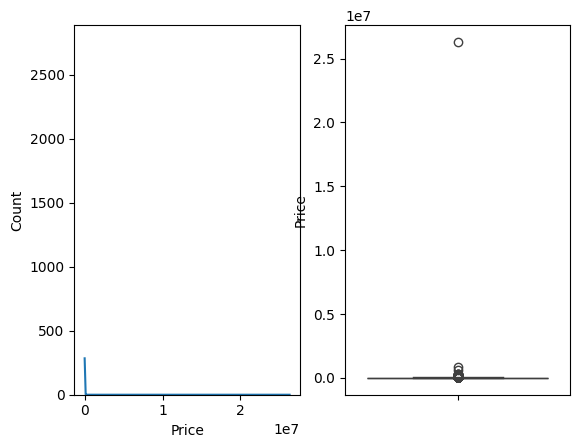

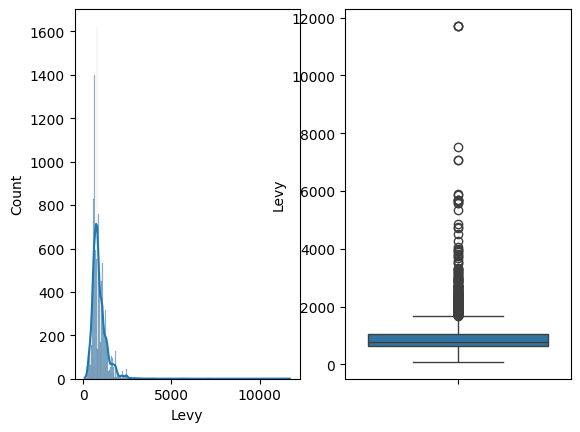

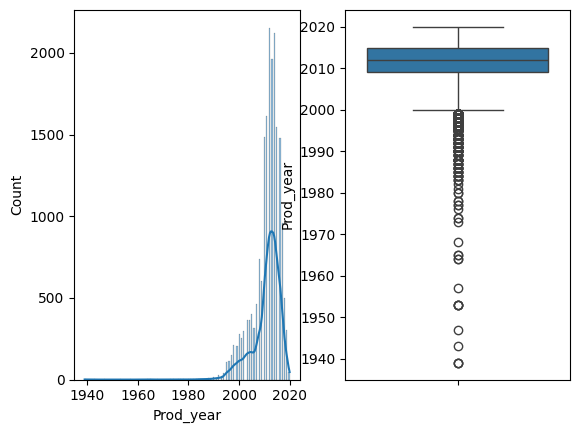

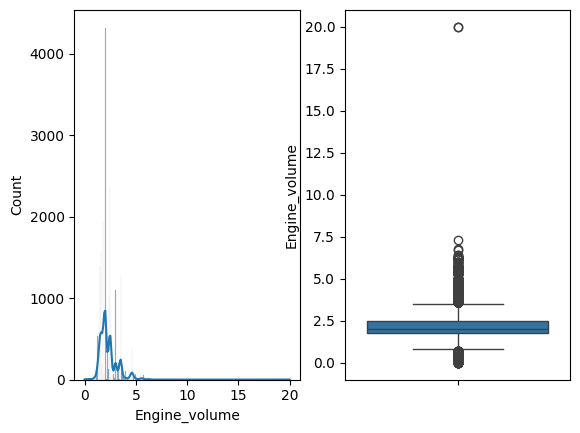

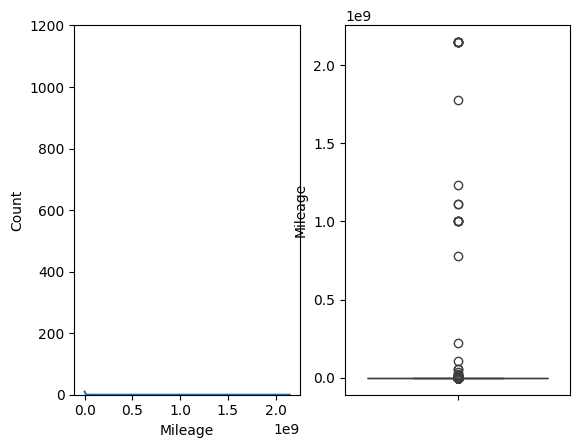

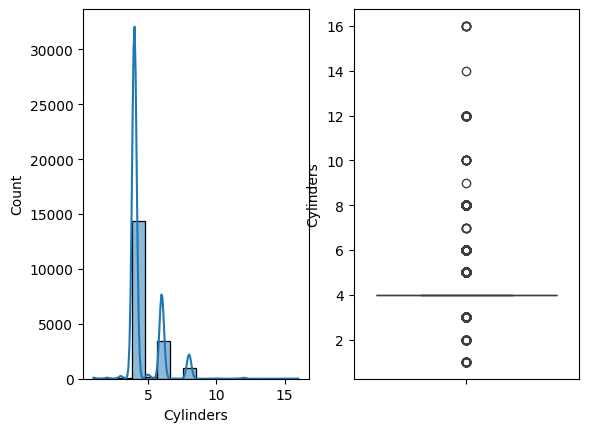

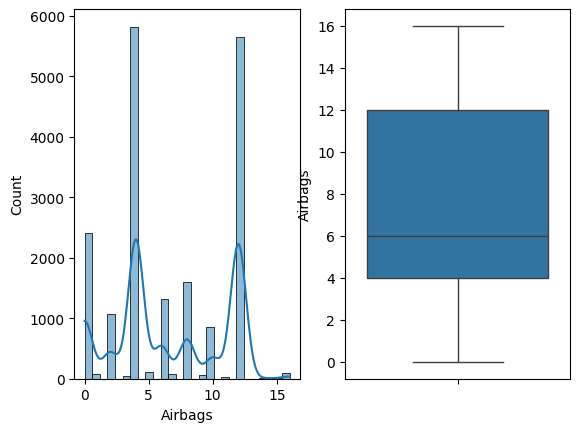

In [642]:
#Uni-variate analysis for numeric columns

num_columns = df.select_dtypes(include="number").columns

for col in num_columns:
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(y = df[col])
    plt.show()

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

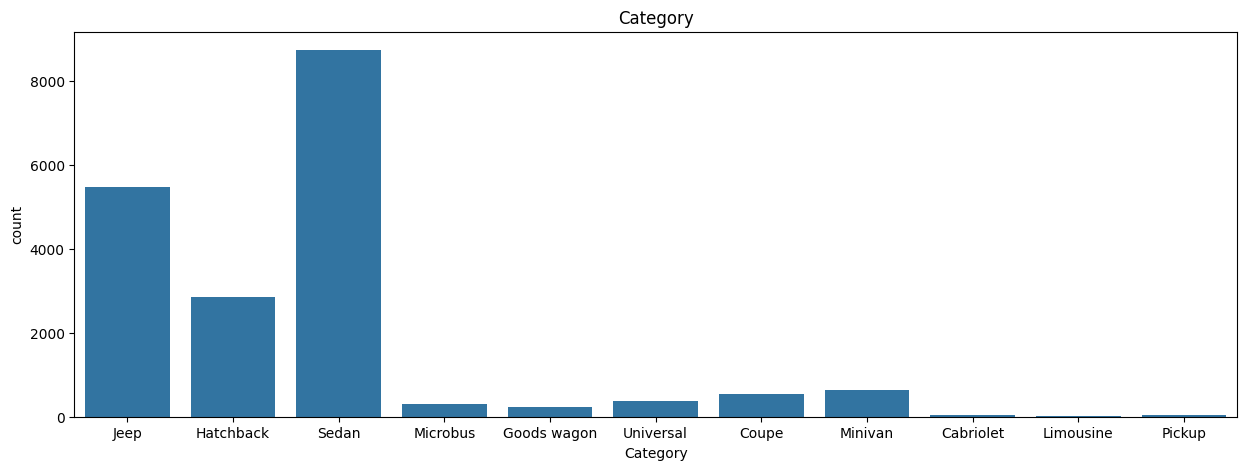

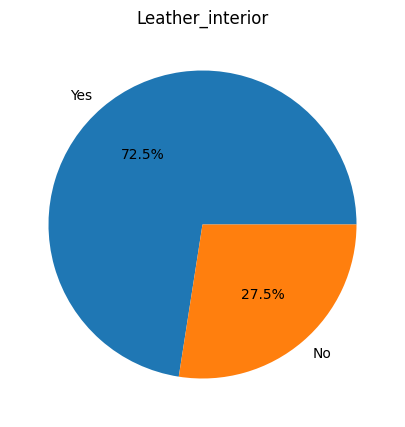

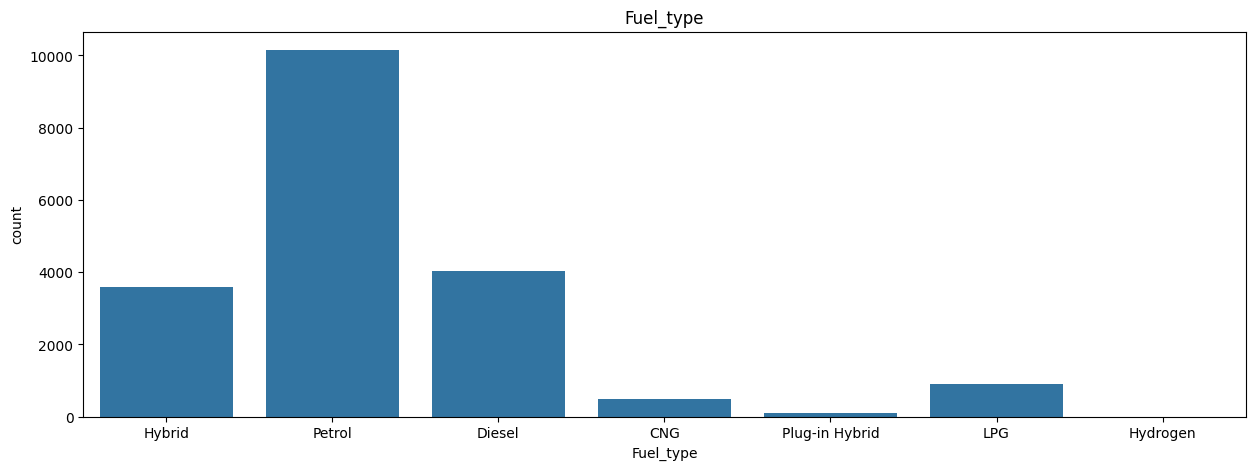

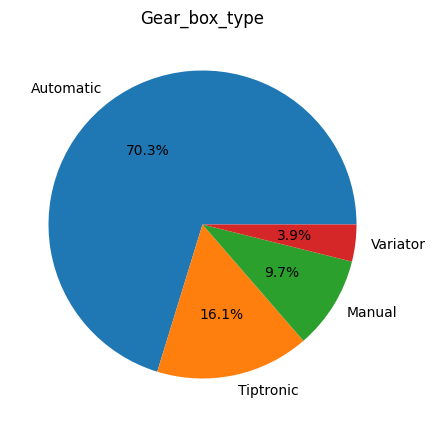

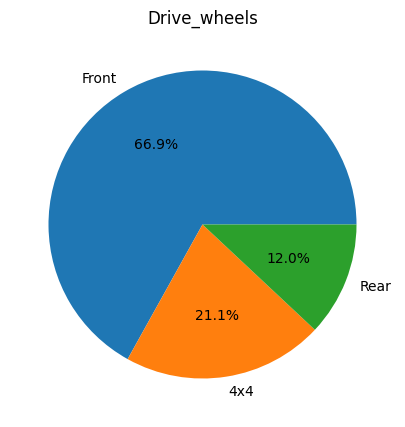

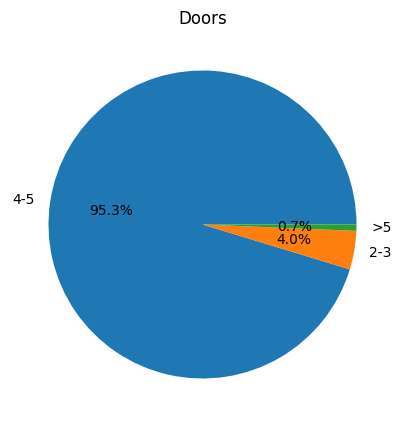

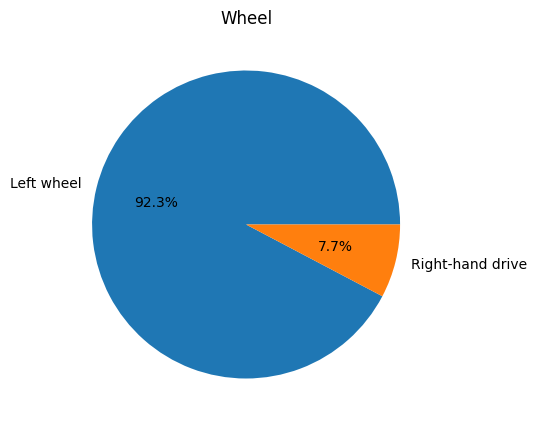

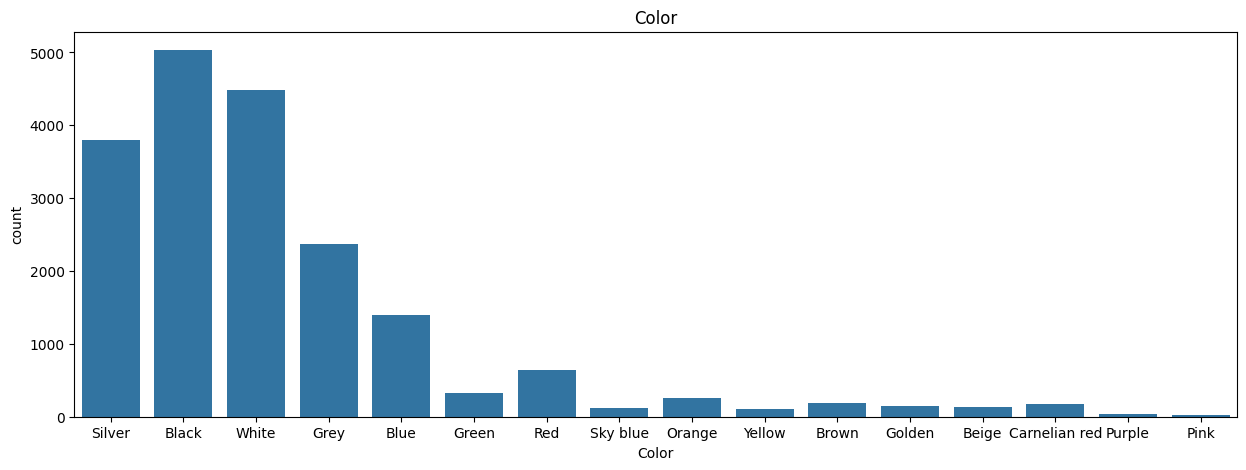

In [151]:
#Uni-variate analysis for categorical columns

for col in cat_columns:
    plt.figure(figsize=(15, 5))
    if df[col].nunique() < 7:
        dff = df.groupby(col)[['Prod_year']].count().reset_index().sort_values(by='Prod_year', ascending=False)
        plt.pie(labels=dff[col], x=dff['Prod_year'], autopct="%1.1f%%")
        plt.title(col)
    elif df[col].nunique() < 50:
        sns.countplot(x=df[col])
        plt.title(col)
    plt.show()

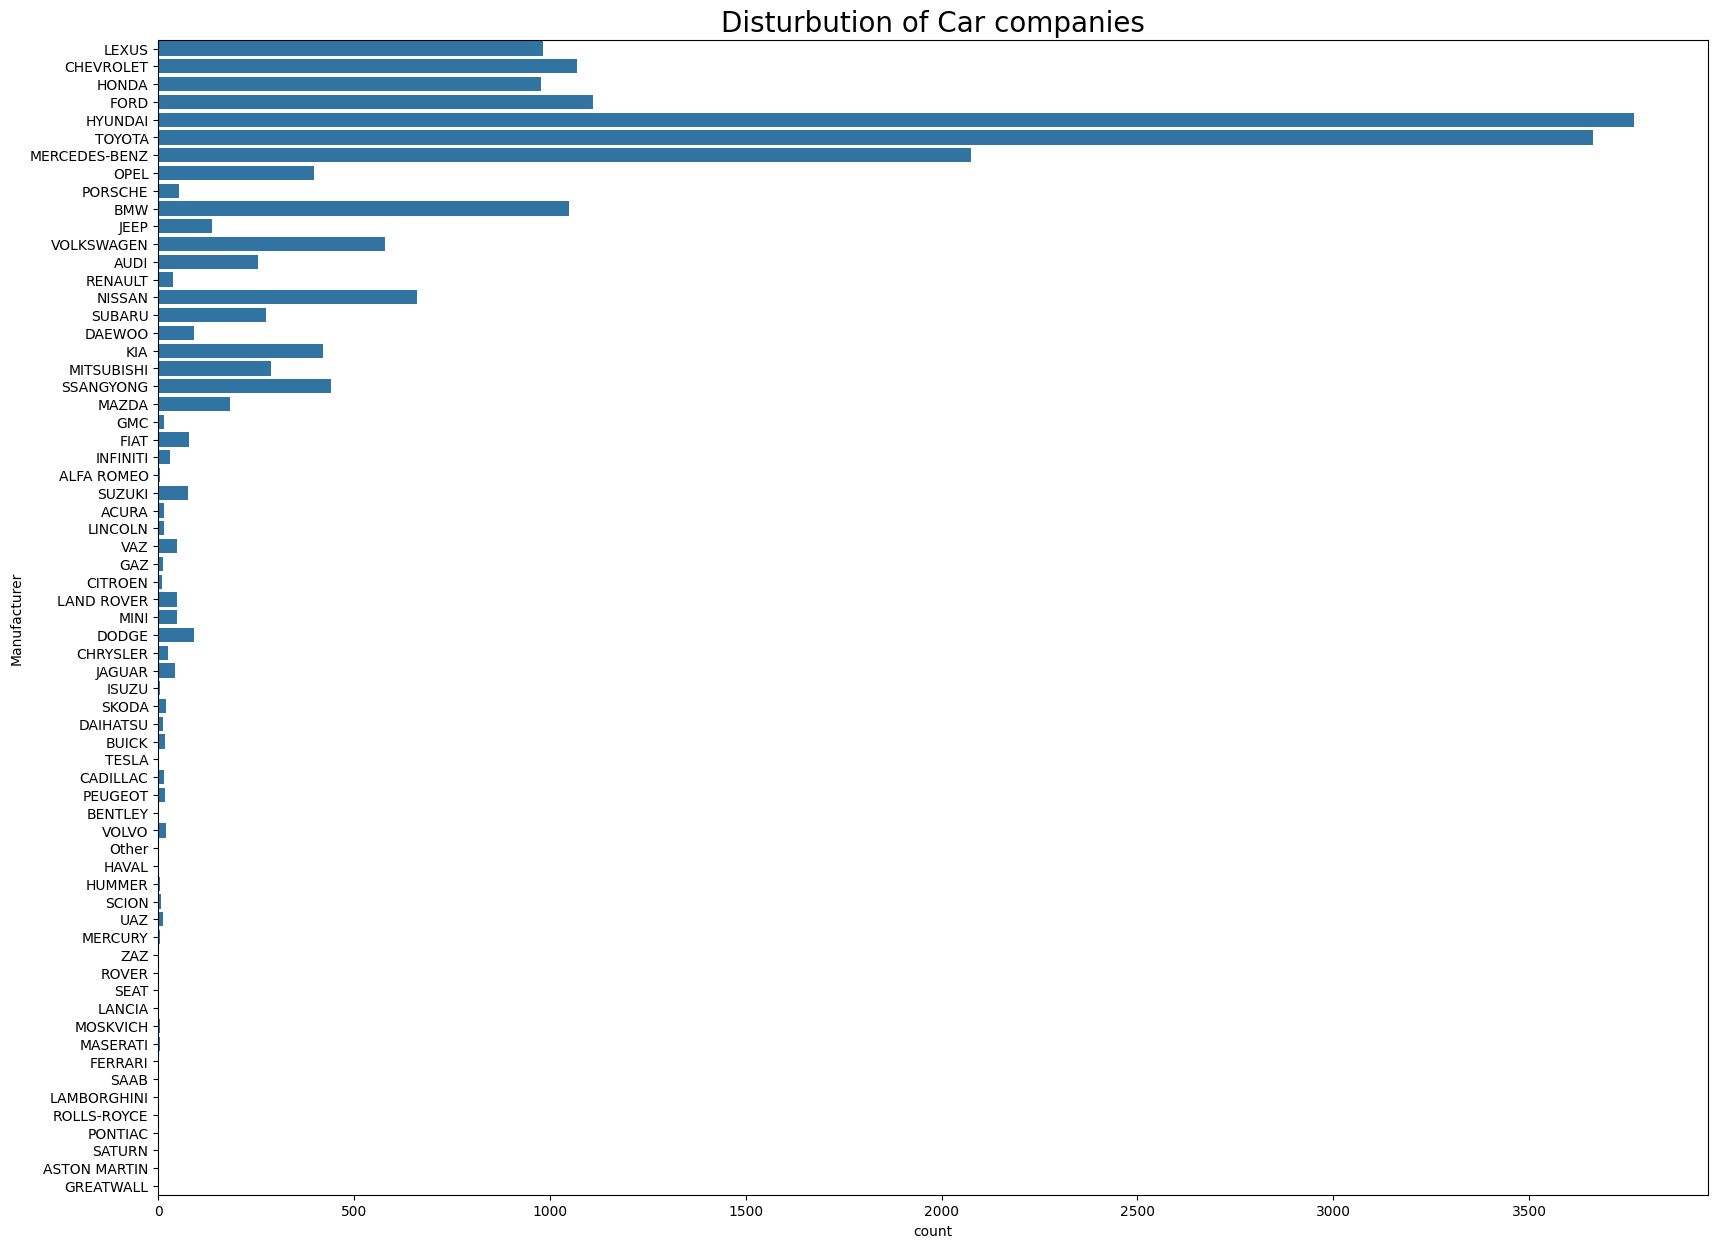

In [189]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df['Manufacturer'])
plt.title("Disturbution of Car companies", fontsize = 20)
plt.show()

# Hyndai, Toyota and Mercedes-Benz are the most 3 frequent manufacturer

In [182]:
df['Model'].nunique()

1590

In [199]:
dff[['Model', 'Count']] = df.groupby('Model')[['Prod_year']].count().reset_index().sort_values(by='Prod_year', ascending=False).head(50)
dff

Model  Prod_year  Count
1154       Prius       1083   1083
1334      Sonata       1079   1079
435        Camry        938    938
633      Elantra        922    922
601        E 350        542    542
1305    Santa FE        533    533
684          FIT        446    446
834           H1        437    437
1442      Tucson        429    429
1533          X5        353    353
262         Aqua        331    331
537        Cruze        302    302
742       Fusion        301    301
1079      Optima        233    233
802       GX 460        224    224
1421     Transit        217    217
847   Highlander        216    216
990       ML 350        202    202
893        Jetta        201    201
248       Actyon        188    188
481        Civic        187    187
1226      REXTON        175    175
1242      RX 450        173    173
1212       RAV 4        167    167
273        Astra        150    150
661       Escape        149    149
803       GX 470        147    147
1502        Volt        144    144
913         Juke        143    143
456      Captiva        140    140
413      CT 200h        135    135
724     Forester        131    131
937      Lacetti        124    124
1162     Prius C        118    118
881      Insight        115    115
1120      Passat        114    114
810      Genesis        105    105
1090     Orlando        102    102
1007      Malibu         91     91
1235      RX 350         86     86
1399      Tacoma         84     84
375          CHR         79     79
715        Focus         76     76
91           328         76     76
1410       Tiida         75     75
595        E 300         75     75
929      Korando         73     73
1363    Sprinter         72     72
1486        Vito         70     70
505      Corolla         67     67

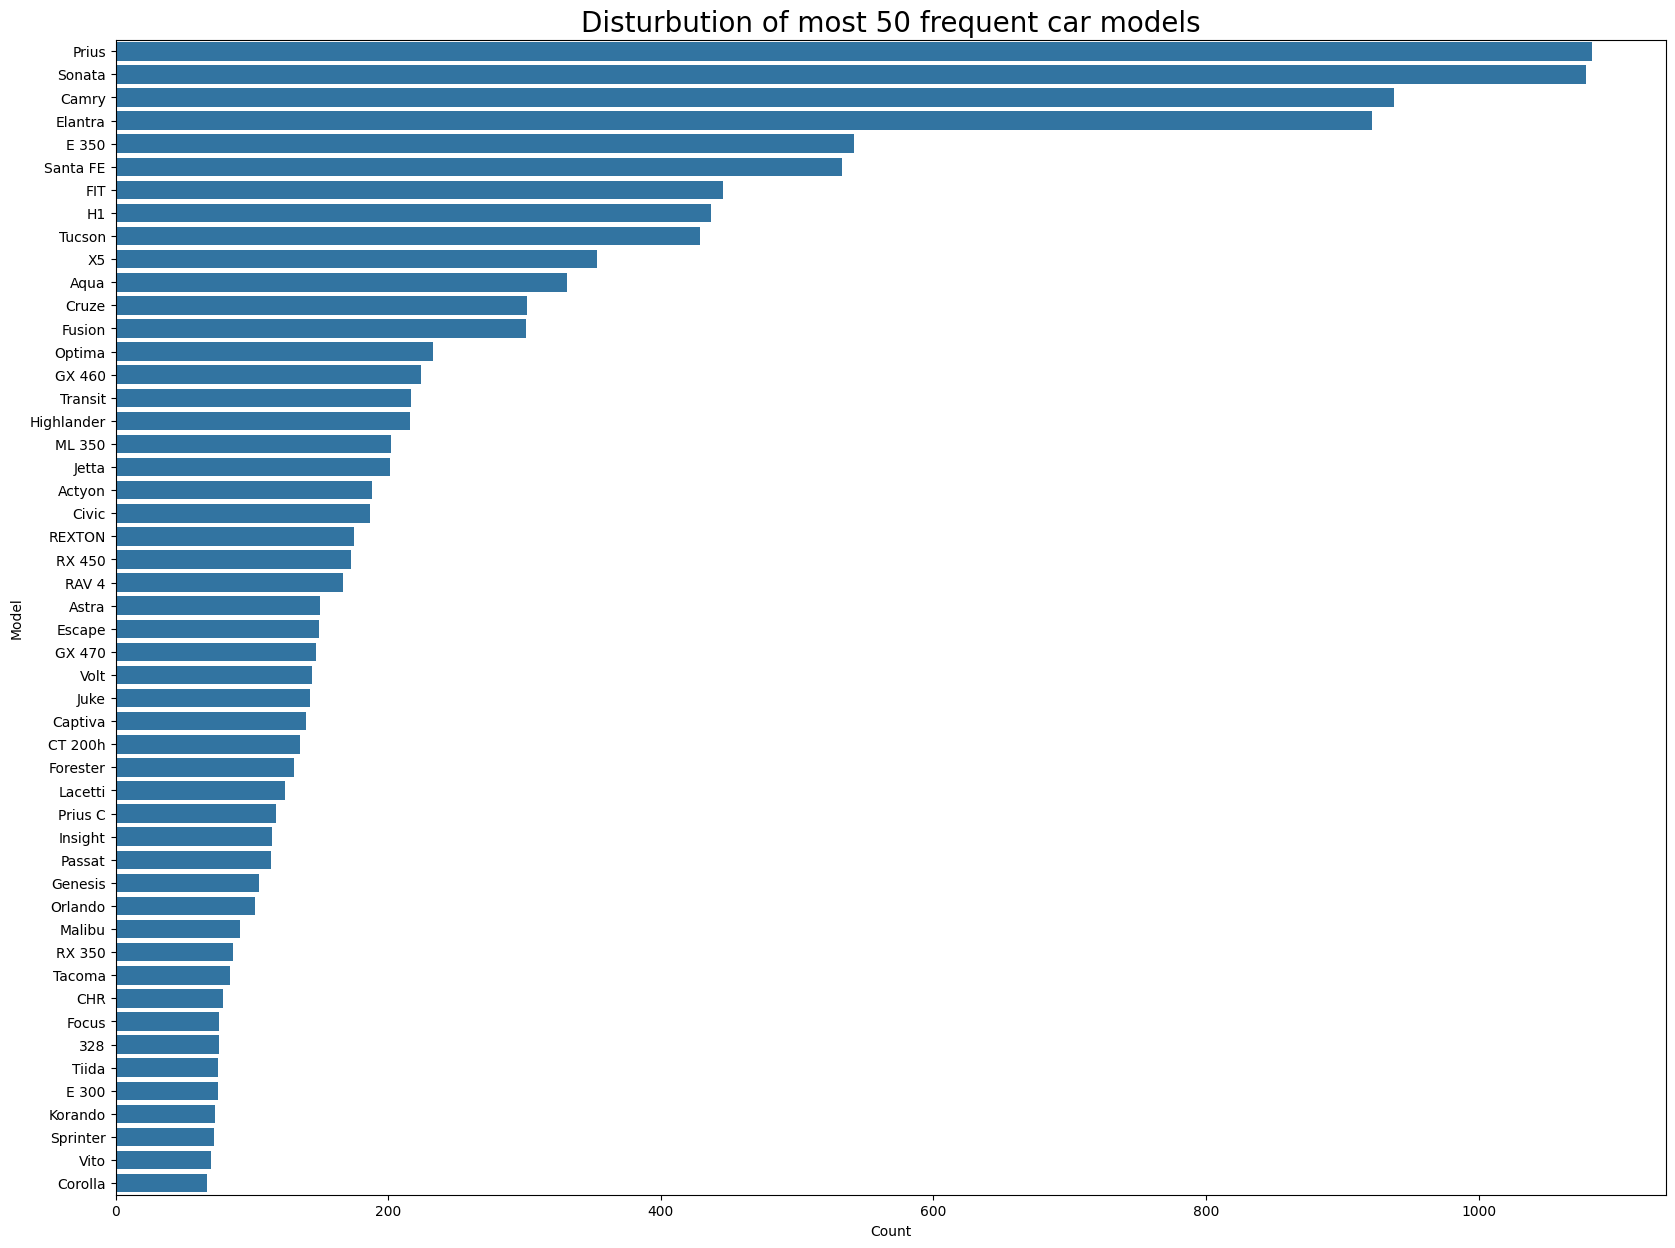

In [203]:
plt.figure(figsize = (20, 15))
sns.barplot(x=dff['Count'], y=dff['Model'])
plt.title("Disturbution of most 50 frequent car models", fontsize = 20)
plt.show()

# Prius and Sonata are the most frequent car models

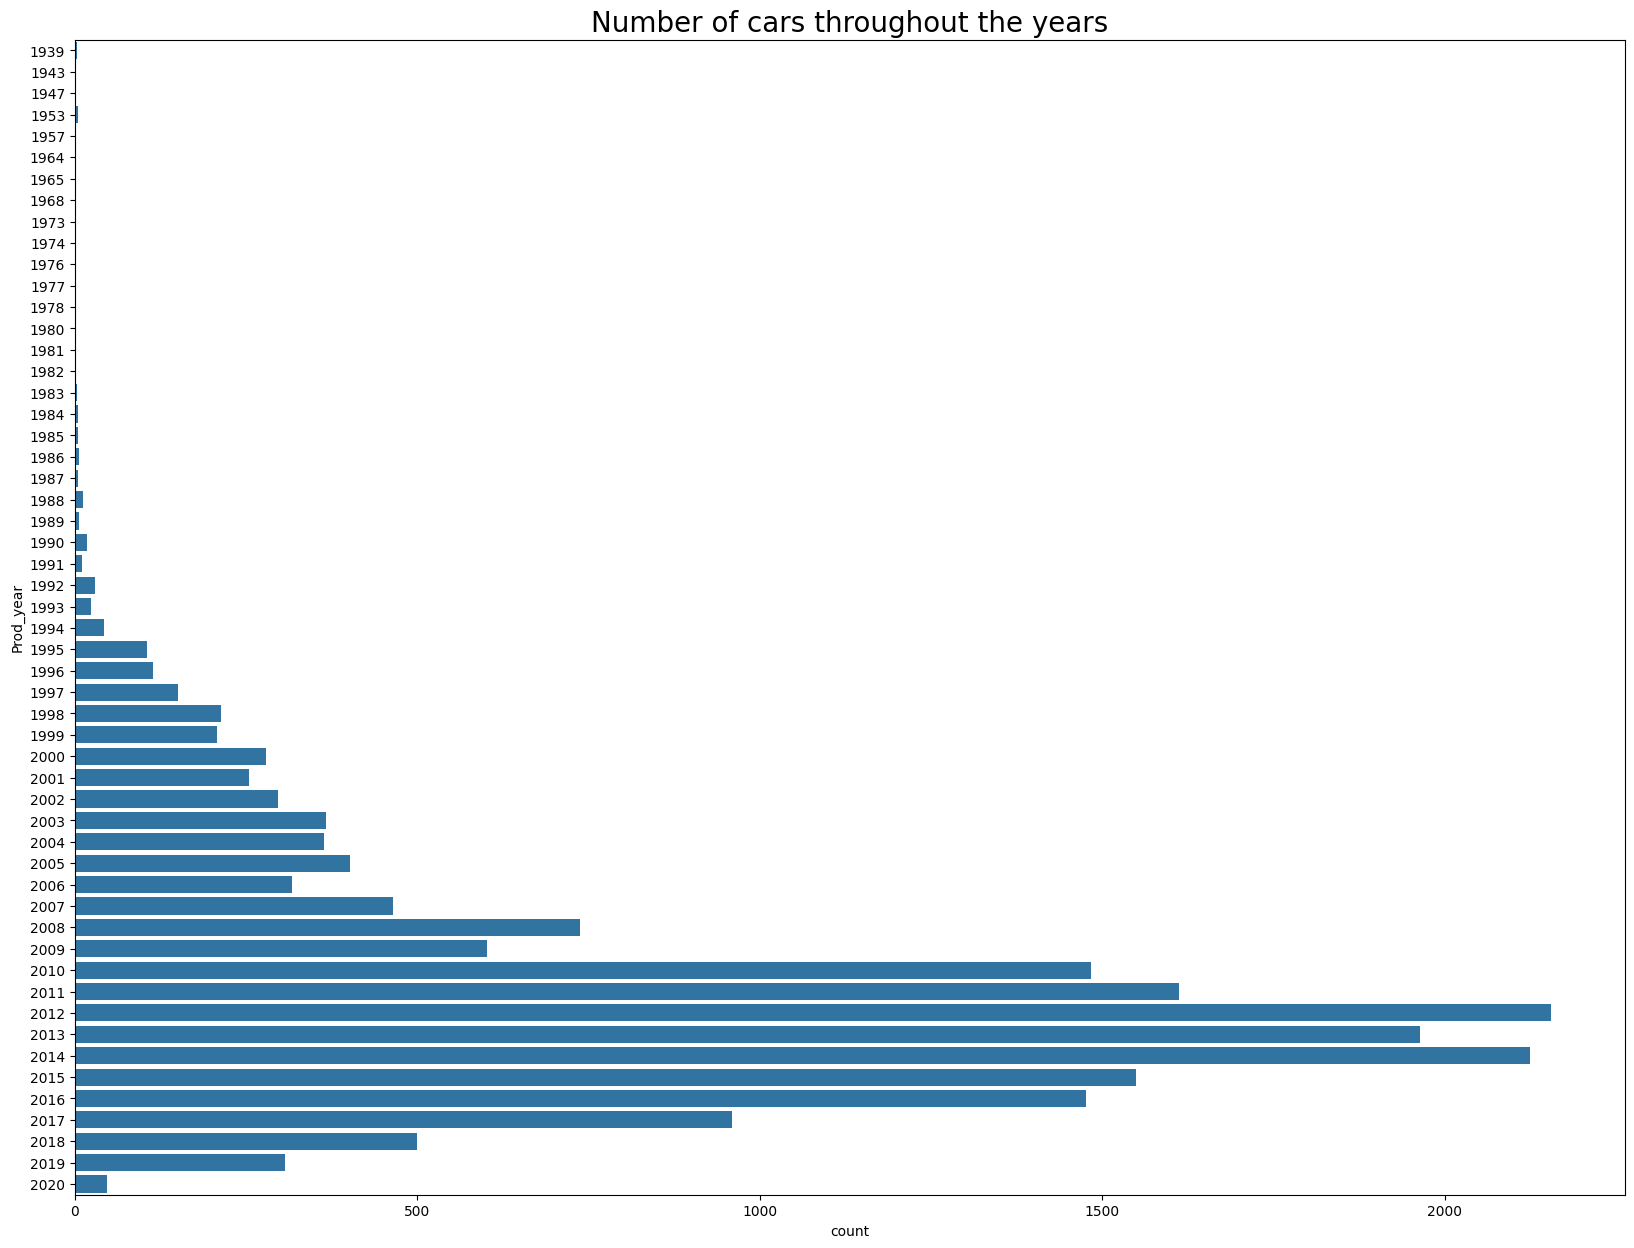

In [210]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df['Prod_year'])
plt.title("Number of cars throughout the years", fontsize = 20)
plt.show()

# 2012 records the most year with production cars

In [645]:
#Bi-variate analysis
#All features are independant.
#There is no strong correlation between target column (Price) and other features therefore it's a challenging data.

dff = df.select_dtypes(include="number")
px.imshow(dff.corr(), text_auto=True, width=800, height=800)

# What is the average prices for cars in different mileage ranges?

In [734]:
def mileage_categorization(arg):
    if arg >= 0 and arg <= 50000:
        return '0-50k'
    elif arg > 50000 and arg <= 100000:
        return '50k-100k'
    elif arg > 100000 and arg <= 200000:
        return '100k-200k'
    elif arg > 200000 and arg <= 300000:
        return '200k-300k'
    elif arg > 300000 and arg <= 400000: 
        return '300k-400k'
    elif arg > 400000 and arg <= 500000:
        return '400k-500k'
    elif arg > 500000 and arg <= 600000:
        return '500k-600k'
    elif arg > 600000 and arg <= 700000:
        return '600k-700k'
    elif arg > 700000 and arg <= 800000:
        return '700k-800k'
    elif arg > 800000 and arg <= 900000:
        return '800k-900k'
    elif arg > 900000 and arg <= 1000000: 
        return '900k-1M'
    elif arg > 1000000 and arg <= 2000000000:
        return '1M-2M'


In [756]:
dff = df.copy()
dff['mileage_cat'] = dff['Mileage'].apply(mileage_categorization)
dff['mileage_cat']


0        100k-200k
1        100k-200k
2        100k-200k
3        100k-200k
4         50k-100k
           ...    
19232    200k-300k
19233    100k-200k
19234    100k-200k
19235     50k-100k
19236    100k-200k
Name: mileage_cat, Length: 19237, dtype: object

In [744]:
dff1 = dff.groupby(['mileage_cat'])[['Price']].median().reset_index().sort_values(by='Price')
dff1

mileage_cat    Price
2        1M-2M   6300.0
4    300k-400k   7525.5
5    400k-500k   7809.0
6    500k-600k   9252.0
8    600k-700k   9252.0
3    200k-300k   9408.0
9    700k-800k   9722.0
11     900k-1M  10976.0
1    100k-200k  13328.0
0        0-50k  14113.0
7     50k-100k  18189.0
10   800k-900k  22894.0

In [748]:
px.bar(dff1, y ='Price', x = 'mileage_cat')

<Figure size 3000x1000 with 0 Axes>

# Trend of model cars with its categories over time

In [229]:
dff = df.groupby(["Prod_year", "Category"])[['Model']].count().reset_index()
px.line(x=dff['Prod_year'], y=dff['Model'], color=dff['Category'])

# Distrubution of average car prices based on production year

In [753]:
dff = df.groupby(["Prod_year"])[['Price']].median().reset_index()
plt.figure(figsize = (20, 10))
px.bar(x=dff['Prod_year'], y=dff['Price'])

<Figure size 2000x1000 with 0 Axes>

# What are the car prices along different categories with the insight of cars with leather interior vs those without?

In [330]:
plt.figure(figsize = (20, 10))
px.violin(x=df['Category'], y=df['Price'], color=df['Leather_interior'])

<Figure size 2000x1000 with 0 Axes>

# What is the effect of car color on price?

In [257]:
px.box(df, x='Color', y='Price')

# Distrubution of car prices based on gear box type and fuel type

In [261]:
px.violin(df, x='Gear_box_type', y='Price', color='Fuel_type')

# What is the average car pricess across the most 50 frequent car models?

In [781]:
plt.figure(figsize = (25, 20))
dff = df.groupby(['Model'])[['Price']].median().reset_index().sort_values(by = 'Price', ascending=False).head(50)
px.bar(dff, y ='Price', x = 'Model')

<Figure size 2500x2000 with 0 Axes>

# What is the average car pricess across different manufacturers?

<Axes: xlabel='Price', ylabel='Manufacturer'>

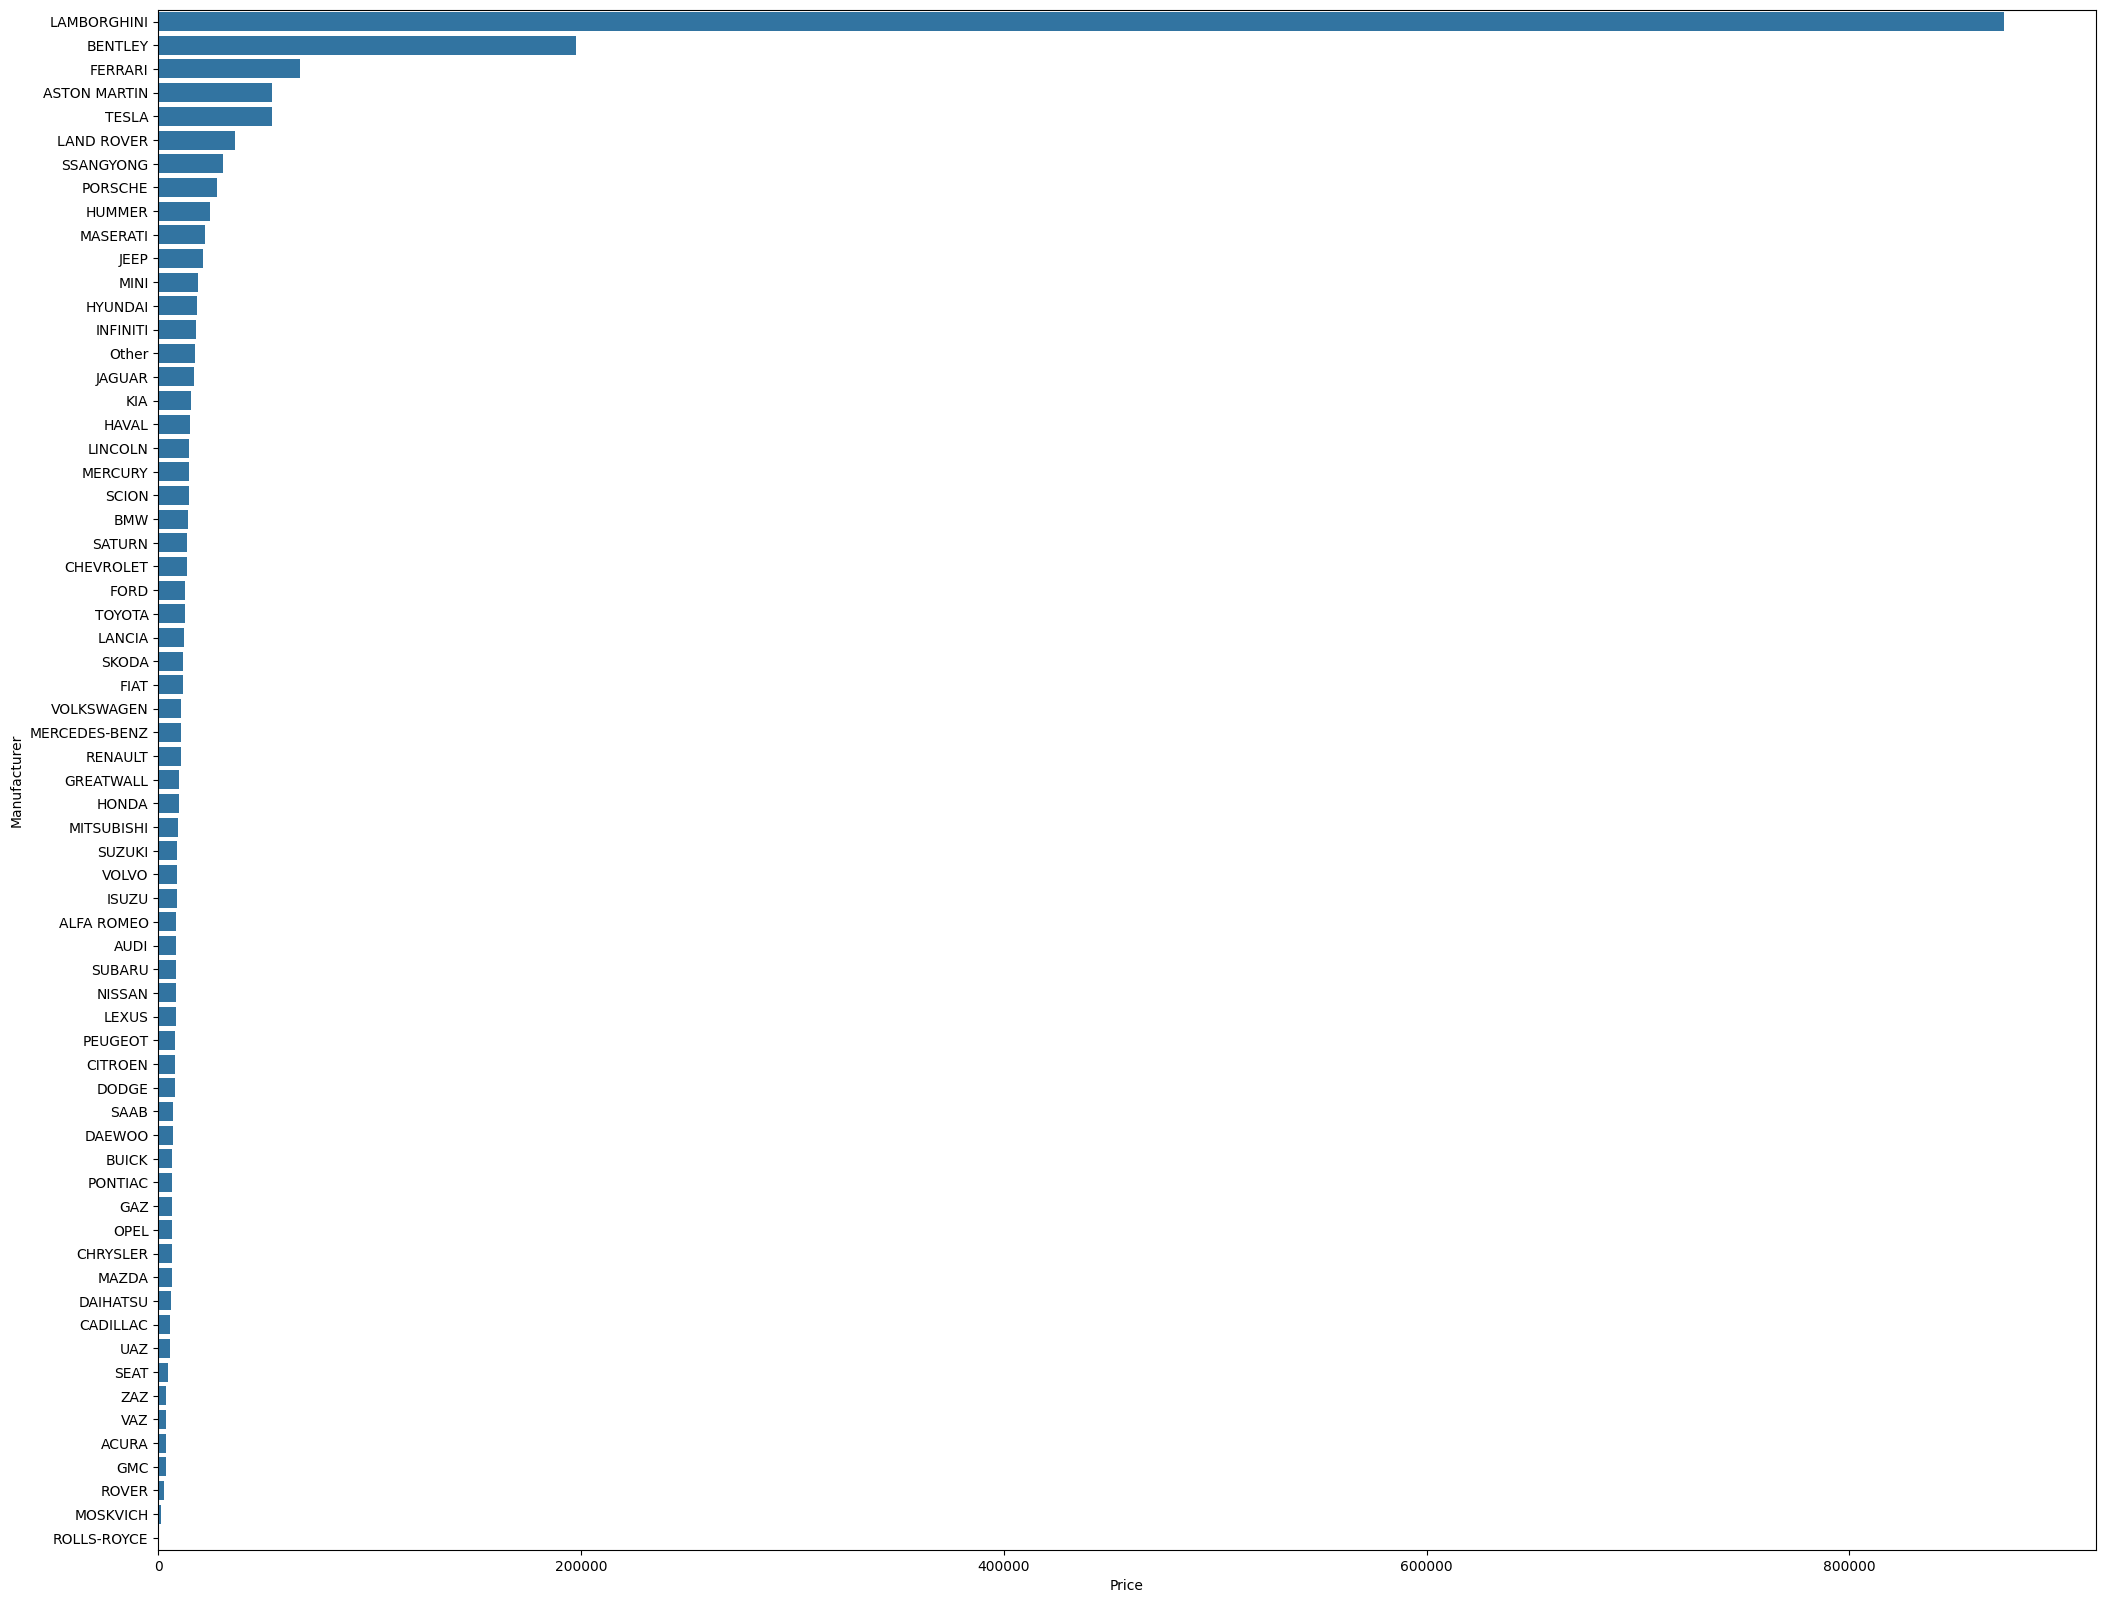

In [733]:
plt.figure(figsize = (25, 20))
dff = df.groupby(['Manufacturer'])[['Price']].median().reset_index().sort_values(by = 'Price', ascending=False)
sns.barplot(x= dff['Price'] , y=dff['Manufacturer'])

# How does price differ based on drive wheels and right/left wheel?

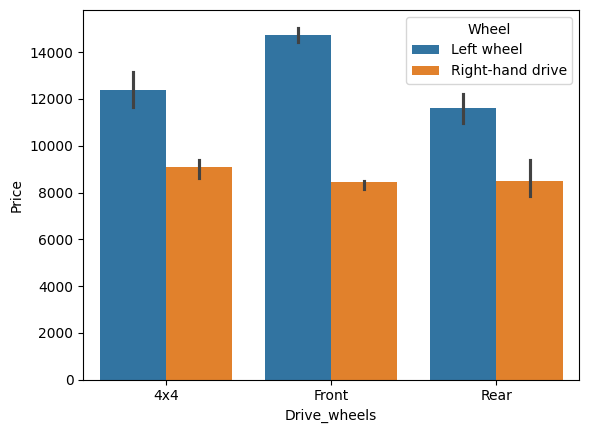

In [761]:
sns.barplot(x=df['Drive_wheels'], y=df['Price'], hue=df['Wheel'], estimator=np.median)
plt.show()

# How does price differ according to number of doors?

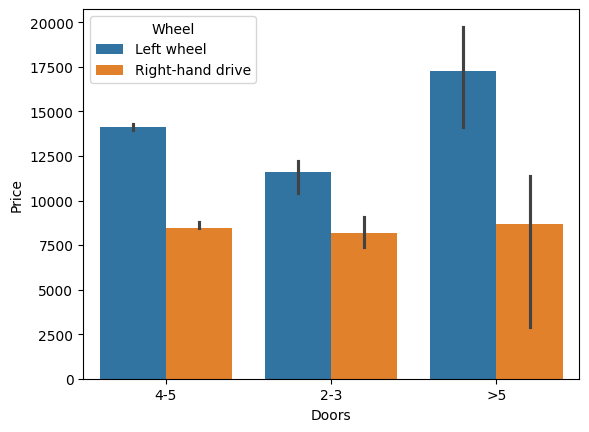

In [760]:
sns.barplot(x=df['Doors'], y=df['Price'], hue=df['Wheel'], estimator=np.median)
plt.show()

# How does the average price of cars differ by the number of airbags?

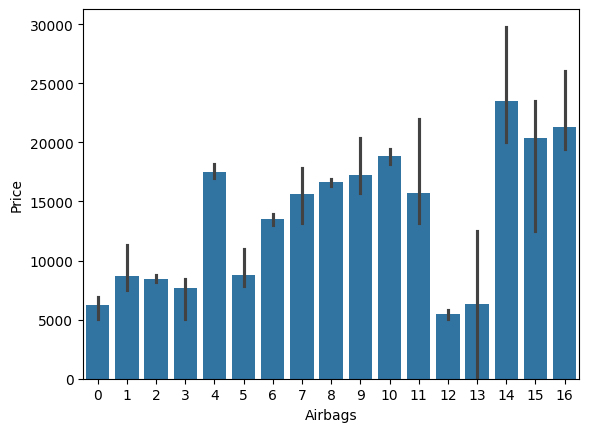

In [759]:
sns.barplot(x=df['Airbags'], y=df['Price'], estimator=np.median)
plt.show()

# How does the average price of cars differ by the number of cylinders?

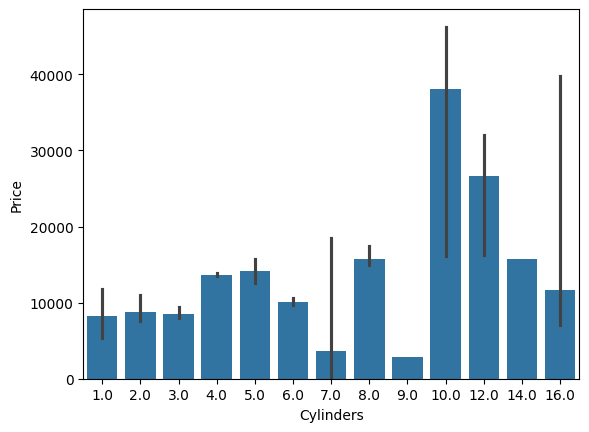

In [762]:
sns.barplot(x=df['Cylinders'], y=df['Price'], estimator=np.median)
plt.show()

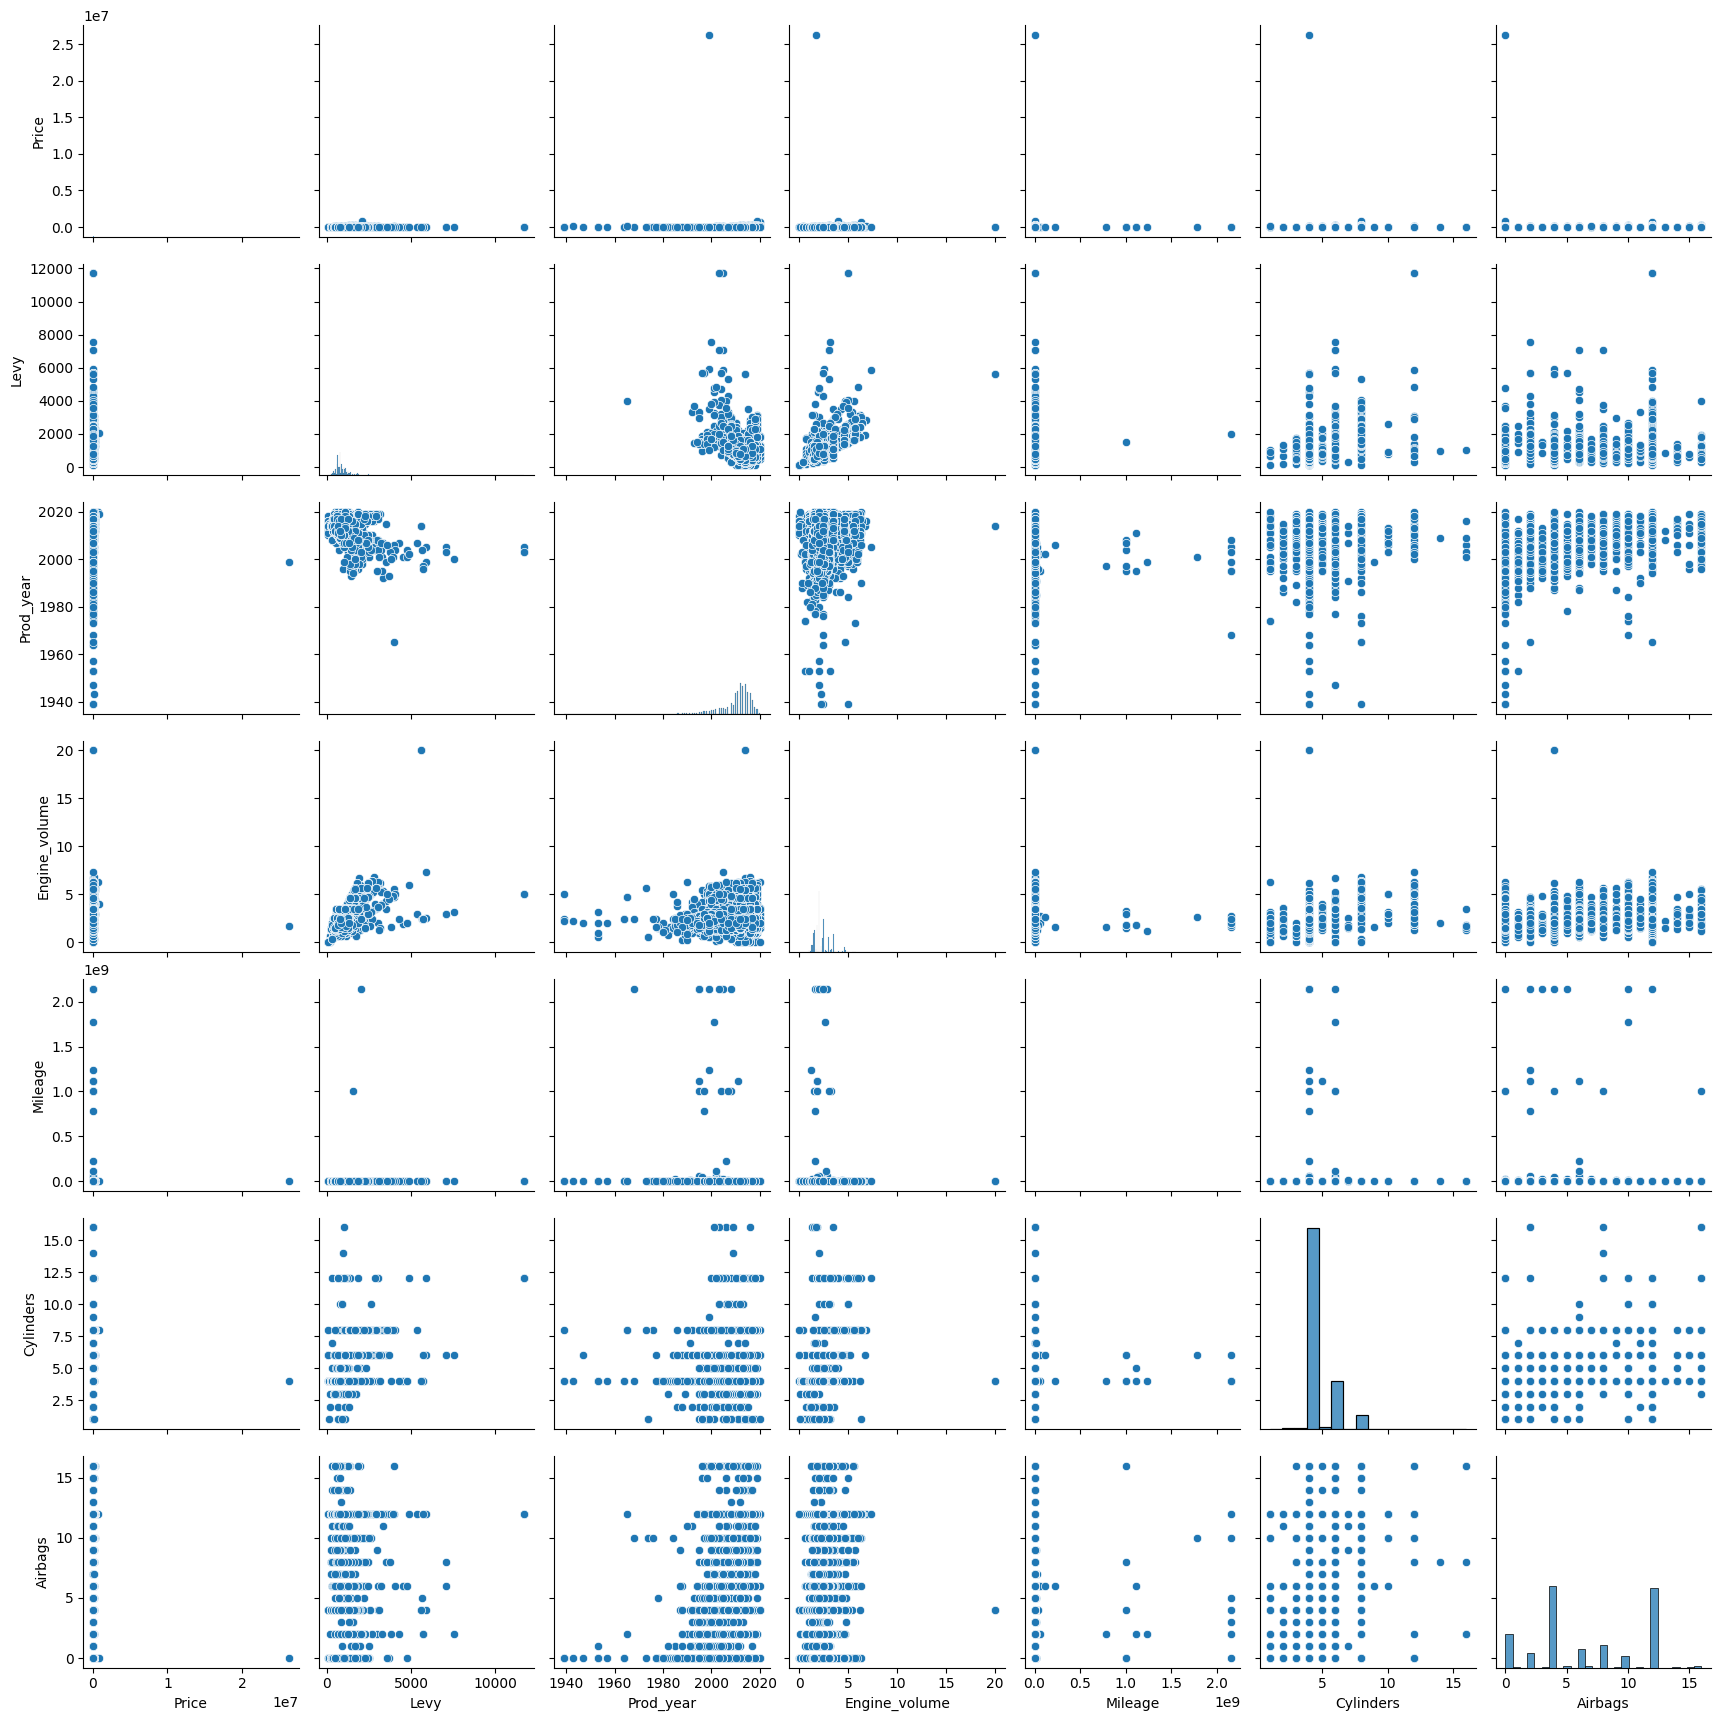

In [782]:
#Multivariate analysis
sns.pairplot(df)

# Pre-Processing

# Detect and handling duplicates

In [502]:
df.duplicated().sum()

np.int64(3512)

In [503]:
df.drop_duplicates(inplace=True)

# Removing unnecessary columns

In [506]:
df.drop(['Color', 'Wheel', 'Doors'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df

Price    Levy   Manufacturer    Model  Prod_year   Category  \
0      13328  1399.0          LEXUS   RX 450       2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox       2011       Jeep   
2       8467     NaN          HONDA      FIT       2006  Hatchback   
3       3607   862.0           FORD   Escape       2011       Jeep   
4      11726   446.0          HONDA      FIT       2014  Hatchback   
...      ...     ...            ...      ...        ...        ...   
15720    470   645.0         TOYOTA    Prius       2011  Hatchback   
15721   8467     NaN  MERCEDES-BENZ  CLK 200       1999      Coupe   
15722  15681   831.0        HYUNDAI   Sonata       2011      Sedan   
15723  26108   836.0        HYUNDAI   Tucson       2010       Jeep   
15724    470   753.0        HYUNDAI   Sonata       2012      Sedan   

      Leather_interior Fuel_type  Engine_volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005        6.0   
1                   No    Petrol            3.0   192000        6.0   
2                   No    Petrol            1.3   200000        4.0   
3                  Yes    Hybrid            2.5   168966        4.0   
4                  Yes    Petrol            1.3    91901        4.0   
...                ...       ...            ...      ...        ...   
15720              Yes    Hybrid            1.8   307325        4.0   
15721              Yes       CNG            2.0   300000        4.0   
15722              Yes    Petrol            2.4   161600        4.0   
15723              Yes    Diesel            2.0   116365        4.0   
15724              Yes    Hybrid            2.4   186923        4.0   

      Gear_box_type Drive_wheels  Airbags  
0         Automatic          4x4       12  
1         Tiptronic          4x4        8  
2          Variator        Front        2  
3         Automatic          4x4        0  
4         Automatic        Front        4  
...             ...          ...      ...  
15720     Automatic        Front       12  
15721        Manual         Rear        5  
15722     Tiptronic        Front        8  
15723     Automatic        Front        4  
15724     Automatic        Front       12  

[15725 rows x 14 columns]

In [507]:
df.duplicated().sum()

np.int64(10)

In [508]:
df.drop_duplicates(inplace=True)

## Spliting production year column into classes so we can encoder it later.

In [ ]:
def year_categorization(arg):
    if arg < 1993:
        return "Nineties"
    elif arg >= 1993 and arg < 2009:
        return "Early 2000s"
    else:
        return "2000s"

In [513]:
df['Prod_year'] = df['Prod_year'].apply(year_categorization)
df

Price    Levy   Manufacturer    Model    Prod_year   Category  \
0      13328  1399.0          LEXUS   RX 450        2000s       Jeep   
1      16621  1018.0      CHEVROLET  Equinox        2000s       Jeep   
2       8467     NaN          HONDA      FIT  Early 2000s  Hatchback   
3       3607   862.0           FORD   Escape        2000s       Jeep   
4      11726   446.0          HONDA      FIT        2000s  Hatchback   
...      ...     ...            ...      ...          ...        ...   
15720    470   645.0         TOYOTA    Prius        2000s  Hatchback   
15721   8467     NaN  MERCEDES-BENZ  CLK 200  Early 2000s      Coupe   
15722  15681   831.0        HYUNDAI   Sonata        2000s      Sedan   
15723  26108   836.0        HYUNDAI   Tucson        2000s       Jeep   
15724    470   753.0        HYUNDAI   Sonata        2000s      Sedan   

      Leather_interior Fuel_type  Engine_volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005        6.0   
1                   No    Petrol            3.0   192000        6.0   
2                   No    Petrol            1.3   200000        4.0   
3                  Yes    Hybrid            2.5   168966        4.0   
4                  Yes    Petrol            1.3    91901        4.0   
...                ...       ...            ...      ...        ...   
15720              Yes    Hybrid            1.8   307325        4.0   
15721              Yes       CNG            2.0   300000        4.0   
15722              Yes    Petrol            2.4   161600        4.0   
15723              Yes    Diesel            2.0   116365        4.0   
15724              Yes    Hybrid            2.4   186923        4.0   

      Gear_box_type Drive_wheels  Airbags  
0         Automatic          4x4       12  
1         Tiptronic          4x4        8  
2          Variator        Front        2  
3         Automatic          4x4        0  
4         Automatic        Front        4  
...             ...          ...      ...  
15720     Automatic        Front       12  
15721        Manual         Rear        5  
15722     Tiptronic        Front        8  
15723     Automatic        Front        4  
15724     Automatic        Front       12  

[15715 rows x 14 columns]

# Mathematical transformation

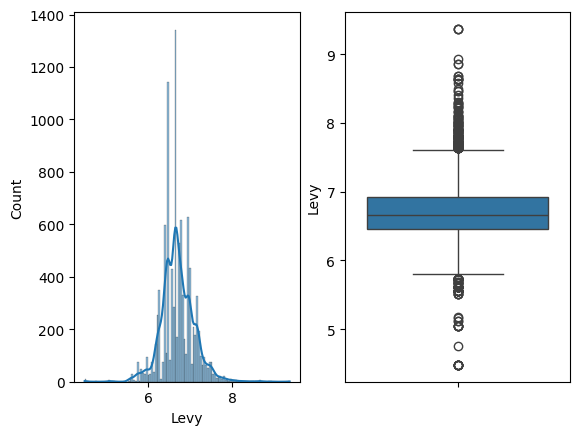

In [517]:
df['Levy'] =  np.log1p(df['Levy'])
plt.subplot(1, 2, 1)
sns.histplot(df['Levy'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(y = df['Levy'])
plt.show()

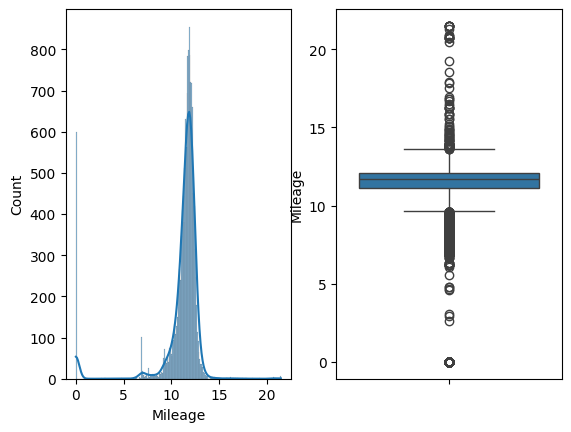

In [518]:
df['Mileage'] =  np.log1p(df['Mileage'])
plt.subplot(1, 2, 1)
sns.histplot(df['Mileage'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(y = df['Mileage'])
plt.show()

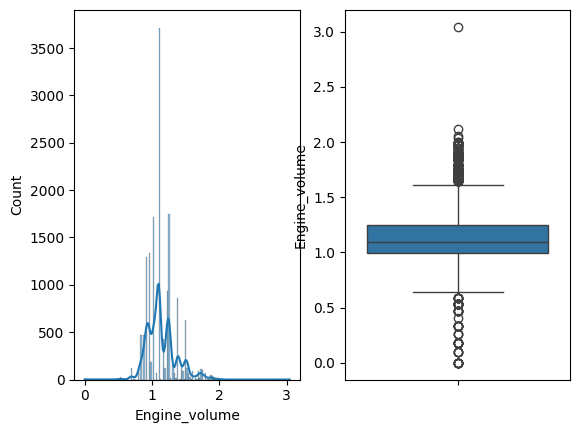

In [519]:
df['Engine_volume'] =  np.log1p(df['Engine_volume'])
plt.subplot(1, 2, 1)
sns.histplot(df['Engine_volume'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(y = df['Engine_volume'])
plt.show()

In [385]:
from sklearn.model_selection import train_test_split

# Train test split

In [581]:
X = df.drop(["Price"], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train

Levy   Manufacturer     Model    Prod_year   Category  \
8500   6.723832          HONDA      Cr-v        2000s       Jeep   
4901   6.610696          HONDA     Civic  Early 2000s      Sedan   
8727        NaN          LEXUS    RX 350        2000s       Jeep   
11472       NaN        PEUGEOT       807  Early 2000s    Minivan   
12524  6.490724           OPEL     Corsa        2000s  Hatchback   
...         ...            ...       ...          ...        ...   
5191        NaN           AUDI  Q7 sport        2000s       Jeep   
13426       NaN  MERCEDES-BENZ      Vito        2000s    Minivan   
5390   6.220590         TOYOTA      Aqua        2000s  Hatchback   
860    6.803505        HYUNDAI    Sonata        2000s      Sedan   
7271   6.729824        HYUNDAI    Tucson        2000s       Jeep   

      Leather_interior Fuel_type  Engine_volume    Mileage  Cylinders  \
8500                No    Petrol       1.223775  11.631410        4.0   
4901                No    Hybrid       0.832909  11.996117        4.0   
8727               Yes    Petrol       1.504077  11.552156        6.0   
11472               No    Diesel       1.163151  12.138869        4.0   
12524               No    Diesel       0.832909  12.107246        4.0   
...                ...       ...            ...        ...        ...   
5191               Yes    Diesel       1.386294  11.082158        6.0   
13426               No    Diesel       1.163151  12.301387        4.0   
5390               Yes    Petrol       0.916291  10.799596        4.0   
860                 No    Petrol       1.223775   0.000000        4.0   
7271               Yes    Diesel       1.098612  12.062029        4.0   

      Gear_box_type Drive_wheels  Airbags  
8500      Automatic          4x4        6  
4901      Automatic        Front        8  
8727      Tiptronic        Front       12  
11472        Manual        Front       16  
12524        Manual        Front       10  
...             ...          ...      ...  
5191      Tiptronic          4x4       12  
13426        Manual         Rear        4  
5390      Automatic        Front        4  
860       Automatic        Front        0  
7271      Automatic        Front        4  

[12572 rows x 13 columns]

# Detect and Handling Nans

In [584]:
X_train.isna().sum()

Levy                4529
Manufacturer           0
Model                  0
Prod_year              0
Category               0
Leather_interior       0
Fuel_type              0
Engine_volume          0
Mileage                0
Cylinders              0
Gear_box_type          0
Drive_wheels           0
Airbags                0
dtype: int64

In [585]:
from sklearn.impute import SimpleImputer

In [586]:
# using median strategy as there are outliers

levy_imputer = SimpleImputer(strategy="median") 
X_train[["Levy"]] = levy_imputer.fit_transform(X_train[["Levy"]])
X_train[["Levy"]]

Levy
8500   6.723832
4901   6.610696
8727   6.659294
11472  6.659294
12524  6.490724
...         ...
5191   6.659294
13426  6.659294
5390   6.220590
860    6.803505
7271   6.729824

[12572 rows x 1 columns]

In [587]:
X_test[["Levy"]] = levy_imputer.transform(X_test[["Levy"]])
X_test[["Levy"]]

Levy
5140   6.161207
6827   6.249975
4546   6.315358
14003  6.463029
14656  6.820016
...         ...
14241  6.659294
6128   6.894670
13761  6.803505
12891  6.659294
7248   6.656727

[3143 rows x 1 columns]

# Detect and Handling outliers

In [588]:
def handle_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    ub_train = q3 + 1.5 * iqr
    lb_train = q1 - 1.5 * iqr
    data[data > ub_train] = ub_train
    data[data < lb_train] = lb_train
    return data, ub_train, lb_train

In [589]:
def handle_outliers_test(test_data, ub_train, lb_train):
    test_data[test_data > ub_train] = ub_train
    test_data[test_data < lb_train] = lb_train
    return test_data

In [590]:
outliers = ['Levy', 'Engine_volume', 'Mileage']
for col in outliers:
    X_train[col], ub_train, lb_train = handle_outliers(X_train[col])
    X_test[col] = handle_outliers_test(X_test[col], ub_train, lb_train)

C:\Users\user\AppData\Local\Temp\ipykernel_27968\2075255718.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_27968\2075255718.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_27968\2439072140.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_27968\2439072140.py:3: SettingWithCopyWarning:


A value is 

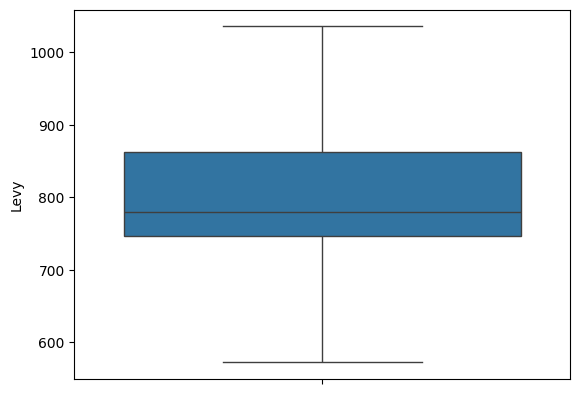

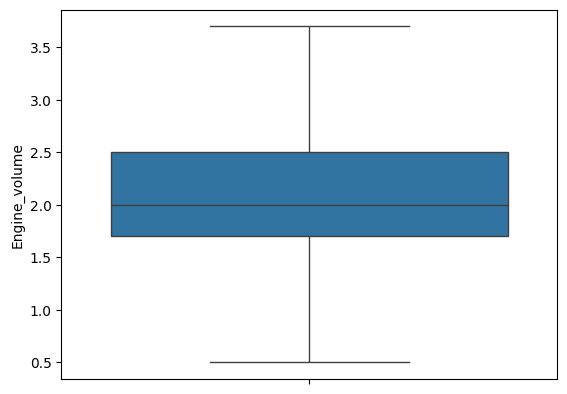

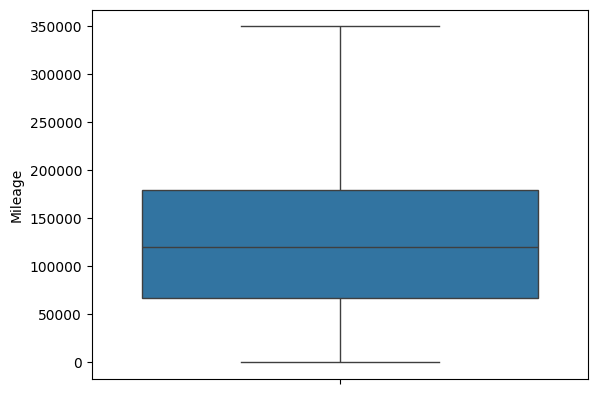

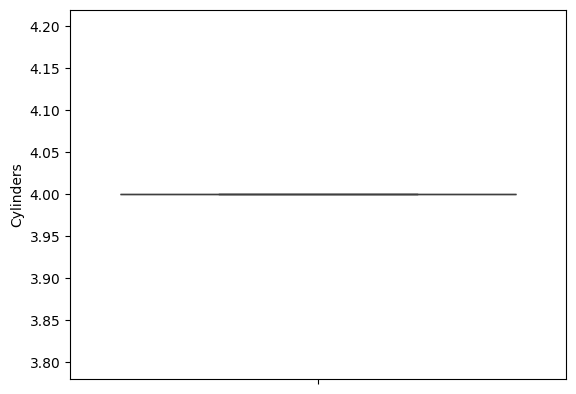

In [548]:
for col in outliers:
    sns.boxplot(y=X_train[col])
    plt.show()

In [591]:
X_test.reset_index(drop=True, inplace=True)
X_test

Levy Manufacturer     Model Prod_year   Category Leather_interior  \
0     6.399541    CHEVROLET     Cruze     2000s      Sedan              Yes   
1     6.399541        LEXUS    RX 450     2000s       Jeep              Yes   
2     6.399541        HONDA       FIT     2000s  Hatchback               No   
3     6.463029      HYUNDAI    Tucson     2000s       Jeep              Yes   
4     6.820016     MASERATI    Ghibli     2000s      Sedan              Yes   
...        ...          ...       ...       ...        ...              ...   
3138  6.659294   MITSUBISHI         I     2000s  Hatchback               No   
3139  6.894670       TOYOTA     Camry     2000s      Sedan              Yes   
3140  6.803505    CHEVROLET   Equinox     2000s       Jeep              Yes   
3141  6.659294          BMW  7.30E+34  Nineties      Sedan              Yes   
3142  6.656727      HYUNDAI        H1     2000s    Minivan              Yes   

     Fuel_type  Engine_volume    Mileage  Cylinders Gear_box_type  \
0       Petrol       0.875469  11.752139        4.0     Automatic   
1       Hybrid       1.504077  10.668979        4.0     Tiptronic   
2       Petrol       0.916291  11.289794        4.0     Automatic   
3       Diesel       1.098612  11.523301        4.0     Automatic   
4       Petrol       1.386294  10.596660        6.0     Automatic   
...        ...            ...        ...        ...           ...   
3138    Petrol       0.603985  11.747215        3.0     Automatic   
3139    Hybrid       1.223775  12.875270        4.0     Automatic   
3140    Petrol       1.223775  11.276279        4.0     Automatic   
3141    Petrol       1.386294  12.611541        6.0        Manual   
3142    Diesel       1.252763  11.716805        4.0     Automatic   

     Drive_wheels  Airbags  
0           Front        4  
1             4x4       12  
2           Front        8  
3           Front        4  
4             4x4       12  
...           ...      ...  
3138         Rear        2  
3139        Front       12  
3140          4x4       12  
3141         Rear        0  
3142        Front        4  

[3143 rows x 13 columns]

In [592]:
X_train.reset_index(drop=True, inplace=True)
X_train

Levy   Manufacturer     Model    Prod_year   Category  \
0      6.723832          HONDA      Cr-v        2000s       Jeep   
1      6.610696          HONDA     Civic  Early 2000s      Sedan   
2      6.659294          LEXUS    RX 350        2000s       Jeep   
3      6.659294        PEUGEOT       807  Early 2000s    Minivan   
4      6.490724           OPEL     Corsa        2000s  Hatchback   
...         ...            ...       ...          ...        ...   
12567  6.659294           AUDI  Q7 sport        2000s       Jeep   
12568  6.659294  MERCEDES-BENZ      Vito        2000s    Minivan   
12569  6.399541         TOYOTA      Aqua        2000s  Hatchback   
12570  6.803505        HYUNDAI    Sonata        2000s      Sedan   
12571  6.729824        HYUNDAI    Tucson        2000s       Jeep   

      Leather_interior Fuel_type  Engine_volume    Mileage  Cylinders  \
0                   No    Petrol       1.223775  11.631410        4.0   
1                   No    Hybrid       0.832909  11.996117        4.0   
2                  Yes    Petrol       1.504077  11.552156        6.0   
3                   No    Diesel       1.163151  12.138869        4.0   
4                   No    Diesel       0.832909  12.107246        4.0   
...                ...       ...            ...        ...        ...   
12567              Yes    Diesel       1.386294  11.082158        6.0   
12568               No    Diesel       1.163151  12.301387        4.0   
12569              Yes    Petrol       0.916291  10.799596        4.0   
12570               No    Petrol       1.223775   9.615054        4.0   
12571              Yes    Diesel       1.098612  12.062029        4.0   

      Gear_box_type Drive_wheels  Airbags  
0         Automatic          4x4        6  
1         Automatic        Front        8  
2         Tiptronic        Front       12  
3            Manual        Front       16  
4            Manual        Front       10  
...             ...          ...      ...  
12567     Tiptronic          4x4       12  
12568        Manual         Rear        4  
12569     Automatic        Front        4  
12570     Automatic        Front        0  
12571     Automatic        Front        4  

[12572 rows x 13 columns]

# Encoding

In [ ]:
# Manufacturer -> #BinaryEncoder
# Model -> BinaryEncoder
# Category -> BinaryEncoder
# Leather_interior -> OneHotEncoder
# Fuel_type -> BinaryEncoder
# Gear_box_type -> OneHotEncoder
# Prod_year -> OneHotEncoder

In [593]:
X_train['Manufacturer'].nunique() #BinaryEncoder

64

In [594]:
X_train['Model'].nunique() #BinaryEncoder

1401

In [595]:
X_train['Category'].nunique() #BinaryEncoder

11

In [596]:
X_train['Leather_interior'].nunique() #OneHotEncoder

2

In [597]:
X_train['Fuel_type'].nunique() #BinaryEncoder

6

In [598]:
X_train['Gear_box_type'].nunique() #OneHotEncoder

4

In [599]:
X_train['Drive_wheels'].nunique() #OneHotEncoder

3

In [600]:
X_train['Prod_year'].nunique() #OneHotEncoder

3

In [601]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

ohe_encoder = OneHotEncoder(sparse_output=False, drop="first")
result = ohe_encoder.fit_transform(X_train[['Drive_wheels', 'Gear_box_type', 'Leather_interior', 'Prod_year']])
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [602]:
nominal_encoded_train = pd.DataFrame(result, columns=ohe_encoder.get_feature_names_out())
nominal_encoded_train

Drive_wheels_Front  Drive_wheels_Rear  Gear_box_type_Manual  \
0                     0.0                0.0                   0.0   
1                     1.0                0.0                   0.0   
2                     1.0                0.0                   0.0   
3                     1.0                0.0                   1.0   
4                     1.0                0.0                   1.0   
...                   ...                ...                   ...   
12567                 0.0                0.0                   0.0   
12568                 0.0                1.0                   1.0   
12569                 1.0                0.0                   0.0   
12570                 1.0                0.0                   0.0   
12571                 1.0                0.0                   0.0   

       Gear_box_type_Tiptronic  Gear_box_type_Variator  Leather_interior_Yes  \
0                          0.0                     0.0                   0.0   
1                          0.0                     0.0                   0.0   
2                          1.0                     0.0                   1.0   
3                          0.0                     0.0                   0.0   
4                          0.0                     0.0                   0.0   
...                        ...                     ...                   ...   
12567                      1.0                     0.0                   1.0   
12568                      0.0                     0.0                   0.0   
12569                      0.0                     0.0                   1.0   
12570                      0.0                     0.0                   0.0   
12571                      0.0                     0.0                   1.0   

       Prod_year_Early 2000s  Prod_year_Nineties  
0                        0.0                 0.0  
1                        1.0                 0.0  
2                        0.0                 0.0  
3                        1.0                 0.0  
4                        0.0                 0.0  
...                      ...                 ...  
12567                    0.0                 0.0  
12568                    0.0                 0.0  
12569                    0.0                 0.0  
12570                    0.0                 0.0  
12571                    0.0                 0.0  

[12572 rows x 8 columns]

In [603]:
result = ohe_encoder.transform(X_test[['Drive_wheels', 'Gear_box_type', 'Leather_interior', 'Prod_year']])
nominal_encoded_test = pd.DataFrame(result, columns=ohe_encoder.get_feature_names_out())
nominal_encoded_test

Drive_wheels_Front  Drive_wheels_Rear  Gear_box_type_Manual  \
0                    1.0                0.0                   0.0   
1                    0.0                0.0                   0.0   
2                    1.0                0.0                   0.0   
3                    1.0                0.0                   0.0   
4                    0.0                0.0                   0.0   
...                  ...                ...                   ...   
3138                 0.0                1.0                   0.0   
3139                 1.0                0.0                   0.0   
3140                 0.0                0.0                   0.0   
3141                 0.0                1.0                   1.0   
3142                 1.0                0.0                   0.0   

      Gear_box_type_Tiptronic  Gear_box_type_Variator  Leather_interior_Yes  \
0                         0.0                     0.0                   1.0   
1                         1.0                     0.0                   1.0   
2                         0.0                     0.0                   0.0   
3                         0.0                     0.0                   1.0   
4                         0.0                     0.0                   1.0   
...                       ...                     ...                   ...   
3138                      0.0                     0.0                   0.0   
3139                      0.0                     0.0                   1.0   
3140                      0.0                     0.0                   1.0   
3141                      0.0                     0.0                   1.0   
3142                      0.0                     0.0                   1.0   

      Prod_year_Early 2000s  Prod_year_Nineties  
0                       0.0                 0.0  
1                       0.0                 0.0  
2                       0.0                 0.0  
3                       0.0                 0.0  
4                       0.0                 0.0  
...                     ...                 ...  
3138                    0.0                 0.0  
3139                    0.0                 0.0  
3140                    0.0                 0.0  
3141                    0.0                 1.0  
3142                    0.0                 0.0  

[3143 rows x 8 columns]

In [604]:
bn_encoder = BinaryEncoder()
nominal_encoded_train_2 = bn_encoder.fit_transform(X_train[['Manufacturer', 'Model', 'Category', 'Gear_box_type']])
nominal_encoded_train_2.reset_index(drop=True, inplace=True)
nominal_encoded_train_2

Manufacturer_0  Manufacturer_1  Manufacturer_2  Manufacturer_3  \
0                   0               0               0               0   
1                   0               0               0               0   
2                   0               0               0               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
12567               0               0               0               1   
12568               0               0               0               1   
12569               0               0               0               1   
12570               0               0               0               1   
12571               0               0               0               1   

       Manufacturer_4  Manufacturer_5  Manufacturer_6  Model_0  Model_1  \
0                   0               0               1        0        0   
1                   0               0               1        0        0   
2                   0               1               0        0        0   
3                   0               1               1        0        0   
4                   1               0               0        0        0   
...               ...             ...             ...      ...      ...   
12567               0               1               0        1        0   
12568               1               0               0        0        0   
12569               0               0               0        0        0   
12570               0               0               1        0        0   
12571               0               0               1        0        0   

       Model_2  ...  Model_8  Model_9  Model_10  Category_0  Category_1  \
0            0  ...        0        0         1           0           0   
1            0  ...        0        1         0           0           0   
2            0  ...        0        1         1           0           0   
3            0  ...        1        0         0           0           0   
4            0  ...        1        0         1           0           1   
...        ...  ...      ...      ...       ...         ...         ...   
12567        1  ...        0        0         1           0           0   
12568        0  ...        0        1         1           0           0   
12569        0  ...        1        1         0           0           1   
12570        0  ...        0        1         0           0           0   
12571        0  ...        1        0         1           0           0   

       Category_2  Category_3  Gear_box_type_0  Gear_box_type_1  \
0               0           1                0                0   
1               1           0                0                0   
2               0           1                0                1   
3               1           1                0                1   
4               0           0                0                1   
...           ...         ...              ...              ...   
12567           0           1                0                1   
12568           1           1                0                1   
12569           0           0                0                0   
12570           1           0                0                0   
12571           0           1                0                0   

       Gear_box_type_2  
0                    1  
1                    1  
2                    0  
3                    1  
4                    1  
...                ...  
12567                0  
12568                1  
12569                1  
12570                1  
12571                1  

[12572 rows x 25 columns]

In [605]:
nominal_encoded_test_2 = bn_encoder.transform(X_test[['Manufacturer', 'Model', 'Category', 'Gear_box_type']])
nominal_encoded_test_2.reset_index(drop=True, inplace=True)
nominal_encoded_test_2

Manufacturer_0  Manufacturer_1  Manufacturer_2  Manufacturer_3  \
0                  0               0               0               1   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               1   
4                  0               1               1               0   
...              ...             ...             ...             ...   
3138               0               0               0               0   
3139               0               0               0               1   
3140               0               0               0               1   
3141               0               0               0               0   
3142               0               0               0               1   

      Manufacturer_4  Manufacturer_5  Manufacturer_6  Model_0  Model_1  \
0                  0               1               1        0        0   
1                  0               1               0        0        0   
2                  0               0               1        0        0   
3                  0               0               1        0        0   
4                  1               0               1        0        1   
...              ...             ...             ...      ...      ...   
3138               1               0               1        0        1   
3139               0               0               0        0        0   
3140               0               1               1        0        0   
3141               1               1               1        0        0   
3142               0               0               1        0        0   

      Model_2  ...  Model_8  Model_9  Model_10  Category_0  Category_1  \
0           0  ...        1        1         0           0           0   
1           0  ...        0        0         1           0           0   
2           0  ...        1        1         0           0           1   
3           0  ...        1        0         1           0           0   
4           0  ...        0        1         0           0           0   
...       ...  ...      ...      ...       ...         ...         ...   
3138        1  ...        1        0         0           0           1   
3139        0  ...        0        0         1           0           0   
3140        0  ...        1        1         1           0           0   
3141        0  ...        0        0         0           0           0   
3142        0  ...        0        1         1           0           0   

      Category_2  Category_3  Gear_box_type_0  Gear_box_type_1  \
0              1           0                0                0   
1              0           1                0                1   
2              0           0                0                0   
3              0           1                0                0   
4              1           0                0                0   
...          ...         ...              ...              ...   
3138           0           0                0                0   
3139           1           0                0                0   
3140           0           1                0                0   
3141           1           0                0                1   
3142           1           1                0                0   

      Gear_box_type_2  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  
...               ...  
3138                1  
3139                1  
3140                1  
3141                1  
3142                1  

[3143 rows x 25 columns]

In [606]:
nominal_train = pd.concat([nominal_encoded_train, nominal_encoded_train_2], axis=1)
nominal_train

Drive_wheels_Front  Drive_wheels_Rear  Gear_box_type_Manual  \
0                     0.0                0.0                   0.0   
1                     1.0                0.0                   0.0   
2                     1.0                0.0                   0.0   
3                     1.0                0.0                   1.0   
4                     1.0                0.0                   1.0   
...                   ...                ...                   ...   
12567                 0.0                0.0                   0.0   
12568                 0.0                1.0                   1.0   
12569                 1.0                0.0                   0.0   
12570                 1.0                0.0                   0.0   
12571                 1.0                0.0                   0.0   

       Gear_box_type_Tiptronic  Gear_box_type_Variator  Leather_interior_Yes  \
0                          0.0                     0.0                   0.0   
1                          0.0                     0.0                   0.0   
2                          1.0                     0.0                   1.0   
3                          0.0                     0.0                   0.0   
4                          0.0                     0.0                   0.0   
...                        ...                     ...                   ...   
12567                      1.0                     0.0                   1.0   
12568                      0.0                     0.0                   0.0   
12569                      0.0                     0.0                   1.0   
12570                      0.0                     0.0                   0.0   
12571                      0.0                     0.0                   1.0   

       Prod_year_Early 2000s  Prod_year_Nineties  Manufacturer_0  \
0                        0.0                 0.0               0   
1                        1.0                 0.0               0   
2                        0.0                 0.0               0   
3                        1.0                 0.0               0   
4                        0.0                 0.0               0   
...                      ...                 ...             ...   
12567                    0.0                 0.0               0   
12568                    0.0                 0.0               0   
12569                    0.0                 0.0               0   
12570                    0.0                 0.0               0   
12571                    0.0                 0.0               0   

       Manufacturer_1  ...  Model_8  Model_9  Model_10  Category_0  \
0                   0  ...        0        0         1           0   
1                   0  ...        0        1         0           0   
2                   0  ...        0        1         1           0   
3                   0  ...        1        0         0           0   
4                   0  ...        1        0         1           0   
...               ...  ...      ...      ...       ...         ...   
12567               0  ...        0        0         1           0   
12568               0  ...        0        1         1           0   
12569               0  ...        1        1         0           0   
12570               0  ...        0        1         0           0   
12571               0  ...        1        0         1           0   

       Category_1  Category_2  Category_3  Gear_box_type_0  Gear_box_type_1  \
0               0           0           1                0                0   
1               0           1           0                0                0   
2               0           0           1                0                1   
3               0           1           1                0                1   
4               1           0           0                0                1   
...           ...         ...         ...              ...              .

In [607]:
nominal_test = pd.concat([nominal_encoded_test, nominal_encoded_test_2], axis=1)
nominal_test

Drive_wheels_Front  Drive_wheels_Rear  Gear_box_type_Manual  \
0                    1.0                0.0                   0.0   
1                    0.0                0.0                   0.0   
2                    1.0                0.0                   0.0   
3                    1.0                0.0                   0.0   
4                    0.0                0.0                   0.0   
...                  ...                ...                   ...   
3138                 0.0                1.0                   0.0   
3139                 1.0                0.0                   0.0   
3140                 0.0                0.0                   0.0   
3141                 0.0                1.0                   1.0   
3142                 1.0                0.0                   0.0   

      Gear_box_type_Tiptronic  Gear_box_type_Variator  Leather_interior_Yes  \
0                         0.0                     0.0                   1.0   
1                         1.0                     0.0                   1.0   
2                         0.0                     0.0                   0.0   
3                         0.0                     0.0                   1.0   
4                         0.0                     0.0                   1.0   
...                       ...                     ...                   ...   
3138                      0.0                     0.0                   0.0   
3139                      0.0                     0.0                   1.0   
3140                      0.0                     0.0                   1.0   
3141                      0.0                     0.0                   1.0   
3142                      0.0                     0.0                   1.0   

      Prod_year_Early 2000s  Prod_year_Nineties  Manufacturer_0  \
0                       0.0                 0.0               0   
1                       0.0                 0.0               0   
2                       0.0                 0.0               0   
3                       0.0                 0.0               0   
4                       0.0                 0.0               0   
...                     ...                 ...             ...   
3138                    0.0                 0.0               0   
3139                    0.0                 0.0               0   
3140                    0.0                 0.0               0   
3141                    0.0                 1.0               0   
3142                    0.0                 0.0               0   

      Manufacturer_1  ...  Model_8  Model_9  Model_10  Category_0  Category_1  \
0                  0  ...        1        1         0           0           0   
1                  0  ...        0        0         1           0           0   
2                  0  ...        1        1         0           0           1   
3                  0  ...        1        0         1           0           0   
4                  1  ...        0        1         0           0           0   
...              ...  ...      ...      ...       ...         ...         ...   
3138               0  ...        1        0         0           0           1   
3139               0  ...        0        0         1           0           0   
3140               0  ...        1        1         1           0           0   
3141               0  ...        0        0         0           0           0   
3142               0  ...        0        1         1           0           0   

      Category_2  Category_3  Gear_box_type_0  Gear_box_type_1  \
0              1           0                0                0   
1              0           1                0                1   
2              0           0                0                0   
3              0           1                0                0   
4              1           0                0                0   
...          ...         ...              ...         

In [608]:
X_train = pd.concat([X_train, nominal_train], axis=1)
X_test = pd.concat([X_test, nominal_test], axis=1)

In [609]:
X_train

Levy   Manufacturer     Model    Prod_year   Category  \
0      6.723832          HONDA      Cr-v        2000s       Jeep   
1      6.610696          HONDA     Civic  Early 2000s      Sedan   
2      6.659294          LEXUS    RX 350        2000s       Jeep   
3      6.659294        PEUGEOT       807  Early 2000s    Minivan   
4      6.490724           OPEL     Corsa        2000s  Hatchback   
...         ...            ...       ...          ...        ...   
12567  6.659294           AUDI  Q7 sport        2000s       Jeep   
12568  6.659294  MERCEDES-BENZ      Vito        2000s    Minivan   
12569  6.399541         TOYOTA      Aqua        2000s  Hatchback   
12570  6.803505        HYUNDAI    Sonata        2000s      Sedan   
12571  6.729824        HYUNDAI    Tucson        2000s       Jeep   

      Leather_interior Fuel_type  Engine_volume    Mileage  Cylinders  ...  \
0                   No    Petrol       1.223775  11.631410        4.0  ...   
1                   No    Hybrid       0.832909  11.996117        4.0  ...   
2                  Yes    Petrol       1.504077  11.552156        6.0  ...   
3                   No    Diesel       1.163151  12.138869        4.0  ...   
4                   No    Diesel       0.832909  12.107246        4.0  ...   
...                ...       ...            ...        ...        ...  ...   
12567              Yes    Diesel       1.386294  11.082158        6.0  ...   
12568               No    Diesel       1.163151  12.301387        4.0  ...   
12569              Yes    Petrol       0.916291  10.799596        4.0  ...   
12570               No    Petrol       1.223775   9.615054        4.0  ...   
12571              Yes    Diesel       1.098612  12.062029        4.0  ...   

      Model_8 Model_9  Model_10  Category_0  Category_1  Category_2  \
0           0       0         1           0           0           0   
1           0       1         0           0           0           1   
2           0       1         1           0           0           0   
3           1       0         0           0           0           1   
4           1       0         1           0           1           0   
...       ...     ...       ...         ...         ...         ...   
12567       0       0         1           0           0           0   
12568       0       1         1           0           0           1   
12569       1       1         0           0           1           0   
12570       0       1         0           0           0           1   
12571       1       0         1           0           0           0   

       Category_3  Gear_box_type_0  Gear_box_type_1  Gear_box_type_2  
0               1                0                0                1  
1               0                0                0                1  
2               1                0                1                0  
3               1                0                1                1  
4               0                0                1                1  
...           ...              ...              ...              ...  
12567           1                0                1                0  
12568           1                0                1                1  
12569           0                0                0                1  
12570           0                0                0                1  
12571           1                0                0                1  

[12572 rows x 46 columns]

In [610]:
X_train.drop(['Drive_wheels', 'Gear_box_type', 'Leather_interior', 'Manufacturer', 'Category', 'Fuel_type', 'Prod_year', 'Model'], axis=1, inplace=True)
X_test.drop(['Drive_wheels', 'Gear_box_type', 'Leather_interior', 'Manufacturer', 'Category', 'Fuel_type', 'Prod_year', 'Model'], axis=1, inplace=True)

In [611]:
X_train

Levy  Engine_volume    Mileage  Cylinders  Airbags  \
0      6.723832       1.223775  11.631410        4.0        6   
1      6.610696       0.832909  11.996117        4.0        8   
2      6.659294       1.504077  11.552156        6.0       12   
3      6.659294       1.163151  12.138869        4.0       16   
4      6.490724       0.832909  12.107246        4.0       10   
...         ...            ...        ...        ...      ...   
12567  6.659294       1.386294  11.082158        6.0       12   
12568  6.659294       1.163151  12.301387        4.0        4   
12569  6.399541       0.916291  10.799596        4.0        4   
12570  6.803505       1.223775   9.615054        4.0        0   
12571  6.729824       1.098612  12.062029        4.0        4   

       Drive_wheels_Front  Drive_wheels_Rear  Gear_box_type_Manual  \
0                     0.0                0.0                   0.0   
1                     1.0                0.0                   0.0   
2                     1.0                0.0                   0.0   
3                     1.0                0.0                   1.0   
4                     1.0                0.0                   1.0   
...                   ...                ...                   ...   
12567                 0.0                0.0                   0.0   
12568                 0.0                1.0                   1.0   
12569                 1.0                0.0                   0.0   
12570                 1.0                0.0                   0.0   
12571                 1.0                0.0                   0.0   

       Gear_box_type_Tiptronic  Gear_box_type_Variator  ...  Model_8  Model_9  \
0                          0.0                     0.0  ...        0        0   
1                          0.0                     0.0  ...        0        1   
2                          1.0                     0.0  ...        0        1   
3                          0.0                     0.0  ...        1        0   
4                          0.0                     0.0  ...        1        0   
...                        ...                     ...  ...      ...      ...   
12567                      1.0                     0.0  ...        0        0   
12568                      0.0                     0.0  ...        0        1   
12569                      0.0                     0.0  ...        1        1   
12570                      0.0                     0.0  ...        0        1   
12571                      0.0                     0.0  ...        1        0   

       Model_10  Category_0  Category_1  Category_2  Category_3  \
0             1           0           0           0           1   
1             0           0           0           1           0   
2             1           0           0           0           1   
3             0           0           0           1           1   
4             1           0           1           0           0   
...         ...         ...         ...         ...         ...   
12567         1           0           0           0           1   
12568         1           0           0           1           1   
12569         0           0           1           0           0   
12570         0           0           0           1           0   
12571         1           0           0           0           1   

       Gear_box_type_0  Gear_box_type_1  Gear_box_type_2  
0                    0                0                1  
1                    0                0                1  
2                    0                1                0  
3                    0                1                1  
4                    0                1                1  
...                ...              ...              ...  
12567                0                1                0  
12568                0                1                1  
12569                0                0                1  
12570                

In [613]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train[["Levy", "Engine_volume", "Mileage", "Airbags"]] = standard_scaler.fit_transform(X_train[["Levy", "Engine_volume", "Mileage", "Airbags"]])
X_test[["Levy", "Engine_volume", "Mileage", "Airbags"]] = standard_scaler.transform(X_test[["Levy", "Engine_volume", "Mileage", "Airbags"]])
X_train

Levy  Engine_volume   Mileage  Cylinders   Airbags  \
0      0.279430       0.418654  0.132231        4.0 -0.135210   
1     -0.365313      -1.470444  0.552341        4.0  0.355441   
2     -0.088363       1.773383  0.040936        6.0  1.336745   
3     -0.088363       0.125649  0.716779        4.0  2.318048   
4     -1.049015      -1.470444  0.680352        4.0  0.846093   
...         ...            ...       ...        ...       ...   
12567 -0.088363       1.204125 -0.500460        6.0  1.336745   
12568 -0.088363       0.125649  0.903986        4.0 -0.625862   
12569 -1.568647      -1.067452 -0.825947        4.0 -0.625862   
12570  0.733471       0.418654 -2.190436        4.0 -1.607165   
12571  0.313575      -0.186273  0.628266        4.0 -0.625862   

       Drive_wheels_Front  Drive_wheels_Rear  Gear_box_type_Manual  \
0                     0.0                0.0                   0.0   
1                     1.0                0.0                   0.0   
2                     1.0                0.0                   0.0   
3                     1.0                0.0                   1.0   
4                     1.0                0.0                   1.0   
...                   ...                ...                   ...   
12567                 0.0                0.0                   0.0   
12568                 0.0                1.0                   1.0   
12569                 1.0                0.0                   0.0   
12570                 1.0                0.0                   0.0   
12571                 1.0                0.0                   0.0   

       Gear_box_type_Tiptronic  Gear_box_type_Variator  ...  Model_8  Model_9  \
0                          0.0                     0.0  ...        0        0   
1                          0.0                     0.0  ...        0        1   
2                          1.0                     0.0  ...        0        1   
3                          0.0                     0.0  ...        1        0   
4                          0.0                     0.0  ...        1        0   
...                        ...                     ...  ...      ...      ...   
12567                      1.0                     0.0  ...        0        0   
12568                      0.0                     0.0  ...        0        1   
12569                      0.0                     0.0  ...        1        1   
12570                      0.0                     0.0  ...        0        1   
12571                      0.0                     0.0  ...        1        0   

       Model_10  Category_0  Category_1  Category_2  Category_3  \
0             1           0           0           0           1   
1             0           0           0           1           0   
2             1           0           0           0           1   
3             0           0           0           1           1   
4             1           0           1           0           0   
...         ...         ...         ...         ...         ...   
12567         1           0           0           0           1   
12568         1           0           0           1           1   
12569         0           0           1           0           0   
12570         0           0           0           1           0   
12571         1           0           0           0           1   

       Gear_box_type_0  Gear_box_type_1  Gear_box_type_2  
0                    0                0                1  
1                    0                0                1  
2                    0                1                0  
3                    0                1                1  
4                    0                1                1  
...                ...              ...              ...  
12567                0                1                0  
12568                0                1                1  
12569                0                0                1  
12570                

In [783]:
from sklearn.preprocessing import RobustScaler

In [616]:
# using robust scaler for Cylinders column as it has outliers that couldn't be handled by mathematical transformation nor by lower boundary and upper boundary.

robust_scaler = RobustScaler()

X_train[["Cylinders"]] = robust_scaler.fit_transform(X_train[["Cylinders"]])
X_test[["Cylinders"]] = robust_scaler.transform(X_test[["Cylinders"]])
X_train

Levy  Engine_volume   Mileage  Cylinders   Airbags  \
0      0.279430       0.418654  0.132231        0.0 -0.135210   
1     -0.365313      -1.470444  0.552341        0.0  0.355441   
2     -0.088363       1.773383  0.040936        2.0  1.336745   
3     -0.088363       0.125649  0.716779        0.0  2.318048   
4     -1.049015      -1.470444  0.680352        0.0  0.846093   
...         ...            ...       ...        ...       ...   
12567 -0.088363       1.204125 -0.500460        2.0  1.336745   
12568 -0.088363       0.125649  0.903986        0.0 -0.625862   
12569 -1.568647      -1.067452 -0.825947        0.0 -0.625862   
12570  0.733471       0.418654 -2.190436        0.0 -1.607165   
12571  0.313575      -0.186273  0.628266        0.0 -0.625862   

       Drive_wheels_Front  Drive_wheels_Rear  Gear_box_type_Manual  \
0                     0.0                0.0                   0.0   
1                     1.0                0.0                   0.0   
2                     1.0                0.0                   0.0   
3                     1.0                0.0                   1.0   
4                     1.0                0.0                   1.0   
...                   ...                ...                   ...   
12567                 0.0                0.0                   0.0   
12568                 0.0                1.0                   1.0   
12569                 1.0                0.0                   0.0   
12570                 1.0                0.0                   0.0   
12571                 1.0                0.0                   0.0   

       Gear_box_type_Tiptronic  Gear_box_type_Variator  ...  Model_8  Model_9  \
0                          0.0                     0.0  ...        0        0   
1                          0.0                     0.0  ...        0        1   
2                          1.0                     0.0  ...        0        1   
3                          0.0                     0.0  ...        1        0   
4                          0.0                     0.0  ...        1        0   
...                        ...                     ...  ...      ...      ...   
12567                      1.0                     0.0  ...        0        0   
12568                      0.0                     0.0  ...        0        1   
12569                      0.0                     0.0  ...        1        1   
12570                      0.0                     0.0  ...        0        1   
12571                      0.0                     0.0  ...        1        0   

       Model_10  Category_0  Category_1  Category_2  Category_3  \
0             1           0           0           0           1   
1             0           0           0           1           0   
2             1           0           0           0           1   
3             0           0           0           1           1   
4             1           0           1           0           0   
...         ...         ...         ...         ...         ...   
12567         1           0           0           0           1   
12568         1           0           0           1           1   
12569         0           0           1           0           0   
12570         0           0           0           1           0   
12571         1           0           0           0           1   

       Gear_box_type_0  Gear_box_type_1  Gear_box_type_2  
0                    0                0                1  
1                    0                0                1  
2                    0                1                0  
3                    0                1                1  
4                    0                1                1  
...                ...              ...              ...  
12567                0                1                0  
12568                0                1                1  
12569                0                0                1  
12570                

In [620]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [622]:
X_train_scaled.to_csv("Mid_Project/project_cleaned_data/X_train_scaled.csv")
X_test_scaled.to_csv("Mid_Project/project_cleaned_data/X_test_scaled.csv")
y_train.to_csv("Mid_Project/project_cleaned_data/y_train.csv")
y_test.to_csv("Mid_Project/project_cleaned_data/y_test.csv")